<table width=100%>
<tr>
    <td><h1 style="text-align: left; font-size:300%;">
        Introduction to Exploratory Data Analysis
    </h1></td>
    <td width="30%">
    <div style="text-align: right">
    <b> Practical Data Science Lessons</b><br><br>
    <b> Riccardo Bertoglio</b><br>
    <a href="mailto:riccardo.bertoglio@polimi.it">riccardo.bertoglio@polimi.it</a><br>
    </div>
</tr>
</table>

## Learning outcomes 🔎

*   [What is Exploratory Data Analysis (EDA)?](#what_is_eda)
*   [Preliminary Exploration](#preliminary_exp)
*   [Descriptive Statistics](#descr_stat)
*   [Data Visualization](#data_viz)
*   [Pandas, Seaborn or Matplotlib?](#pandas_seaborn_matplotlib)
*   [Summary of functions](#summary)

#### Resources:
*   *[Harvard 2021 CS109-A: Introduction to Data Science](https://harvard-iacs.github.io/2021-CS109A/)*

<a id='what_is_eda'></a>
## What is Exploratory Data Analysis (EDA)?
Exploratory Data Analysis (EDA) is a critical phase in the data analysis process where the primary goal is **to understand the characteristics of the data at hand**. It involves **visually and statistically summarizing** the main features of a dataset, often using graphical representations, to uncover patterns, trends, anomalies, and insights. EDA helps analysts and data scientists form hypotheses, identify relationships between variables, and guide the direction of further analysis.

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Load data

The file *quartets.csv* contains 4 different tiny datasets that we will use to quickly understand the value of plotting.

In [3]:
quartets = pd.read_csv('data/quartets.csv', index_col=0)

<a id='preliminary_exp'></a>
## Preliminary Exploration

In [4]:
quartets.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44 entries, 1 to 11
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   x        44 non-null     int64  
 1   y        44 non-null     float64
 2   quartet  44 non-null     object 
dtypes: float64(1), int64(1), object(1)
memory usage: 1.4+ KB


We see there are 44 entries, two numerical columns x and y and one column to potentially identify every quartet dataset.

How does this dataframe look like?

In [5]:
quartets.head()

,x,y,quartet
1,10,8.04,I
2,8,6.95,I
3,13,7.58,I
4,9,8.81,I
5,11,8.33,I


How do random samples look like?

In [6]:
quartets.sample(5)

,x,y,quartet
4,9,8.77,II
2,8,5.76,IV
1,10,7.46,III
7,6,7.24,I
3,13,7.58,I


Quartet's names

In [7]:
quartets['quartet'].unique().tolist()

['I', 'II', 'III', 'IV']

Display the first 3 samples from every dataset

In [8]:
quartets.groupby('quartet').head(3)

,x,y,quartet
1,10,8.04,I
2,8,6.95,I
3,13,7.58,I
1,10,9.14,II
2,8,8.14,II
3,13,8.74,II
1,10,7.46,III
2,8,6.77,III
3,13,12.74,III
1,8,6.58,IV


Display 2 random samples from every dataset

In [9]:
quartets.groupby('quartet').sample(2)

,x,y,quartet
2,8,6.95,I
8,4,4.26,I
3,13,8.74,II
1,10,9.14,II
4,9,7.11,III
6,14,8.84,III
5,8,8.47,IV
2,8,5.76,IV


Display every quartet's dataset size

In [10]:
quartets.groupby('quartet').size()

quartet
I      11
II     11
III    11
IV     11
dtype: int64

<a id='descr_stat'></a>
## Descriptive Statistics

In [11]:
# agg() is a method to ggregate using one or more operations over the specified axis
quartets.groupby('quartet').agg(['mean', 'std']).round(3)

x             y       
        mean    std   mean    std
quartet                          
I        9.0  3.317  7.501  2.032
II       9.0  3.317  7.501  2.032
III      9.0  3.317  7.500  2.030
IV       9.0  3.317  7.501  2.031

Almost same mean and standard deviation for every quartet.  
This looks like all quartets samples could be sampled from the same distribution.  
These are tiny datasets so we could read them all!

In [12]:
quartets[quartets['quartet'] == 'I']

,x,y,quartet
1,10,8.04,I
2,8,6.95,I
3,13,7.58,I
4,9,8.81,I
5,11,8.33,I
6,14,9.96,I
7,6,7.24,I
8,4,4.26,I
9,12,10.84,I
10,7,4.82,I


In [13]:
quartets[quartets['quartet'] == 'II']

,x,y,quartet
1,10,9.14,II
2,8,8.14,II
3,13,8.74,II
4,9,8.77,II
5,11,9.26,II
6,14,8.10,II
7,6,6.13,II
8,4,3.10,II
9,12,9.13,II
10,7,7.26,II


In [14]:
quartets[quartets['quartet'] == 'III']

,x,y,quartet
1,10,7.46,III
2,8,6.77,III
3,13,12.74,III
4,9,7.11,III
5,11,7.81,III
6,14,8.84,III
7,6,6.08,III
8,4,5.39,III
9,12,8.15,III
10,7,6.42,III


In [15]:
quartets[quartets['quartet'] == 'IV']

,x,y,quartet
1,8,6.58,IV
2,8,5.76,IV
3,8,7.71,IV
4,8,8.84,IV
5,8,8.47,IV
6,8,7.04,IV
7,8,5.25,IV
8,19,12.50,IV
9,8,5.56,IV
10,8,7.91,IV


### Central Tendency and Dispersion

When doing descriptive / statistical analysis we are interested on central tendency and dispersion, of which, mean and standard deviation are special cases. **Central tendency** measures summarize the **center or average of the data**, while **dispersion** measures indicate **how spread out** or variable the data points are.

1. Central Tendency:

    **Mean (Average)**: The mean is the sum of all values divided by the number of observations. It represents the center of the distribution.
    $ \text{Mean} = \frac{\sum_{i=1}^{n} X_i}{n} $

    **Median**: The median is the middle value when the data is sorted. It is less sensitive to outliers than the mean and provides a measure of the central position.
    $ \text{Median} = \text{Middle value in sorted data} $

    **Mode**: The mode is the most frequently occurring value in the dataset. A distribution can be unimodal (one mode), bimodal (two modes), or multimodal (more than two modes).
    $ \text{Mode} = \text{Most frequently occurring value} $

2. Dispersion:

    **Range**: The range is the difference between the maximum and minimum values in the dataset. It provides a simple measure of the spread but is sensitive to outliers.
    $ \text{Range} = \text{Max} - \text{Min} $

    **Variance**: Variance measures the average squared difference of each data point from the mean. A higher variance indicates greater dispersion.
    $ \text{Variance} = \frac{\sum_{i=1}^{n} (X_i - \text{Mean})^2}{n} $

    **Standard Deviation**: The standard deviation is the square root of the variance. It provides a more interpretable measure of dispersion in the original units of the data.
    $ \text{Standard Deviation} = \sqrt{\text{Variance}} $

    **Interquartile Range (IQR)**: IQR is the range between the first quartile (Q1) and the third quartile (Q3). It is less sensitive to outliers than the range.
    $ \text{IQR} = Q3 - Q1 $

Understanding:
* If the mean, median, and mode are close, the distribution is likely symmetric.
* If the mean is greater than the median, the distribution may be right-skewed (positively skewed), and vice versa.
* A large range, variance, or standard deviation indicates higher dispersion.
* IQR is useful for identifying the spread of the middle 50% of the data.

<a id='data_viz'></a>
## Data Visualization

Pandas by default comes with matplotlib incorporated.

*Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.*

### BoxPlot

Box plots provide a summary of the distribution, including the median, quartiles, and potential outliers. The box represents the interquartile range (IQR), and the whiskers extend to the minimum and maximum values within a certain range. By default, they extend no more than 1.5 * IQR (IQR = Q3 - Q1) from the edges of the box, ending at the farthest data point within that interval. Outliers are plotted as separate dots.

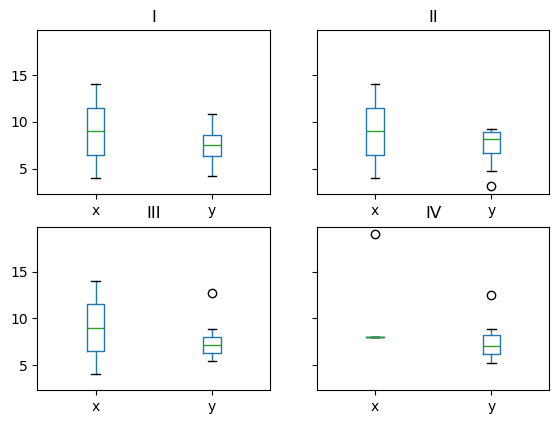

In [16]:
quartets.groupby('quartet').boxplot(grid=False);

### [Seaborn's palettes](https://seaborn.pydata.org/tutorial/color_palettes.html)

In [8]:
sns.color_palette()

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

In [9]:
sns.color_palette('pastel')

[(0.6313725490196078, 0.788235294117647, 0.9568627450980393),
 (1.0, 0.7058823529411765, 0.5098039215686274),
 (0.5529411764705883, 0.8980392156862745, 0.6313725490196078),
 (1.0, 0.6235294117647059, 0.6078431372549019),
 (0.8156862745098039, 0.7333333333333333, 1.0),
 (0.8705882352941177, 0.7333333333333333, 0.6078431372549019),
 (0.9803921568627451, 0.6901960784313725, 0.8941176470588236),
 (0.8117647058823529, 0.8117647058823529, 0.8117647058823529),
 (1.0, 0.996078431372549, 0.6392156862745098),
 (0.7254901960784313, 0.9490196078431372, 0.9411764705882353)]

In [10]:
palette = 'pastel'

**Seaborn's boxplots**

Similar boxplots with Matplotlib and Seaborn

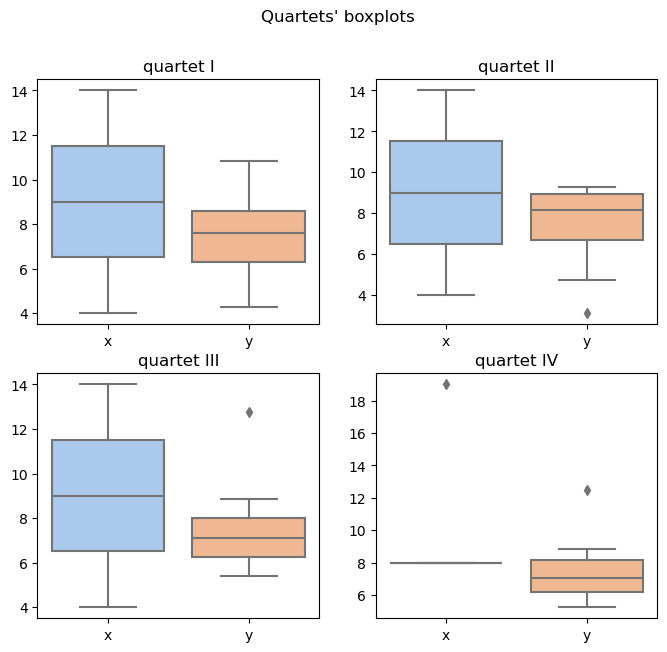

In [20]:
fig, axes = plt.subplots(2, 2, figsize=(8,7))
axes = axes.flatten().tolist()
for quartet, g in quartets.groupby('quartet'):
    ax = axes.pop(0)
    sns.boxplot(data=g, ax=ax, palette=palette);    
    ax.set_title(f'quartet {quartet}')
plt.suptitle("Quartets' boxplots");

Using seaborn boxplots to compare quartes's shared features

- [seaborn.boxplot()](https://seaborn.pydata.org/generated/seaborn.boxplot.html)
- [pandas.melt()](https://pandas.pydata.org/docs/reference/api/pandas.melt.html)

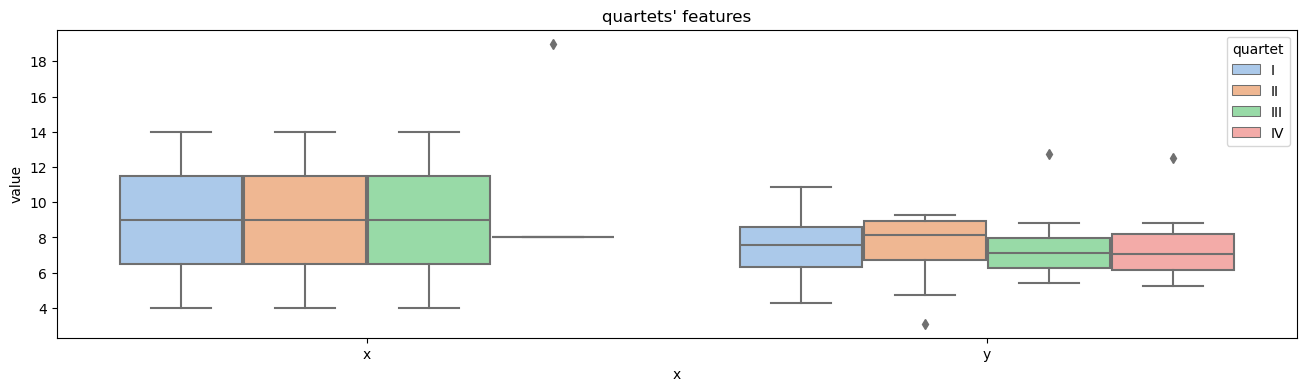

In [21]:
fig, ax = plt.subplots(1, 1, figsize=(16,4))
sns.boxplot(x='x', y='value', hue='quartet',
            data=pd.melt(quartets, id_vars='quartet', var_name='x', value_name='value'),
            ax=ax, palette=palette)
ax.set_title("quartets' features");

In [22]:
pd.melt(quartets, id_vars='quartet', var_name='x', value_name='value')

,quartet,x,value
0,I,x,10.00
1,I,x,8.00
2,I,x,13.00
3,I,x,9.00
4,I,x,11.00
...,...,...,...
83,IV,y,5.25
84,IV,y,12.50
85,IV,y,5.56
86,IV,y,7.91


The problem with the plot above is that we are forcing different features (like `x` and `y`) to share the same y-axis.

So, another way to acomplish the goal could be this one

<Axes: xlabel='quartet', ylabel='x'>

Text(0.5, 1.0, 'variable x')

<Axes: xlabel='quartet', ylabel='y'>

Text(0.5, 1.0, 'variable y')

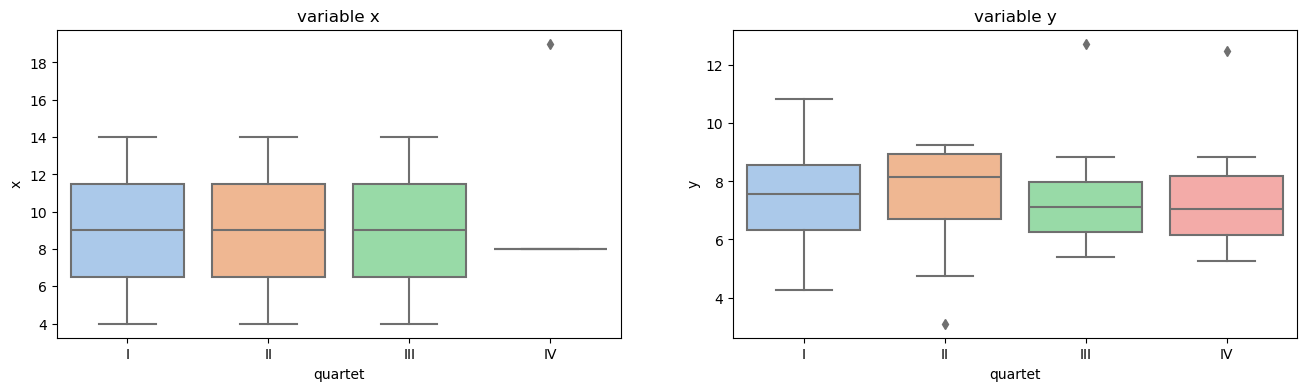

In [23]:
fig, axes = plt.subplots(1, 2, figsize=(16,4))
for i, col in enumerate(['x', 'y']):
    sns.boxplot(x='quartet', y=col, data=quartets, ax=axes[i], palette=palette);
    axes[i].set_title(f'variable {col}')

### Histograms

Histograms provide a visual representation of the distribution of a continuous variable. The data is divided into bins, and the height of each bar represents the frequency or count of observations within that bin.

Pandas let us easily plot the individual quartet's feature histogram in one line of code.

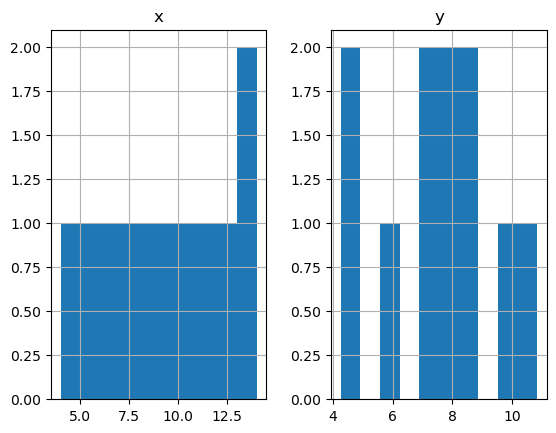

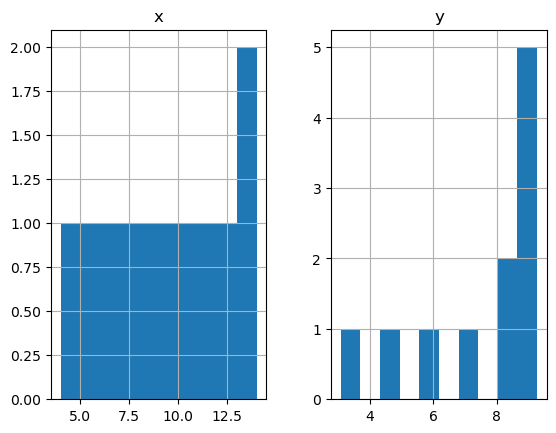

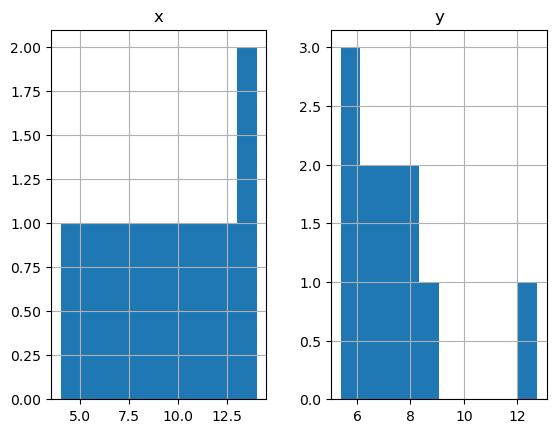

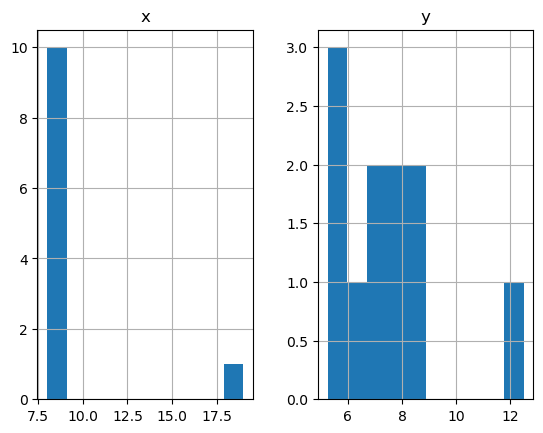

In [24]:
quartets.groupby('quartet').hist();

The histograms allows us to start to see some differences

**Seaborn's histograms**

[seaborn.histplot()](https://seaborn.pydata.org/generated/seaborn.histplot.html)

We could do the same with seaborn with this code

C:\Users\Ticio\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='x', ylabel='Count'>

C:\Users\Ticio\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='y', ylabel='Count'>

Text(0.5, 0.98, 'Quartet I')

C:\Users\Ticio\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='x', ylabel='Count'>

C:\Users\Ticio\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='y', ylabel='Count'>

Text(0.5, 0.98, 'Quartet II')

C:\Users\Ticio\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='x', ylabel='Count'>

C:\Users\Ticio\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='y', ylabel='Count'>

Text(0.5, 0.98, 'Quartet III')

C:\Users\Ticio\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='x', ylabel='Count'>

C:\Users\Ticio\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='y', ylabel='Count'>

Text(0.5, 0.98, 'Quartet IV')

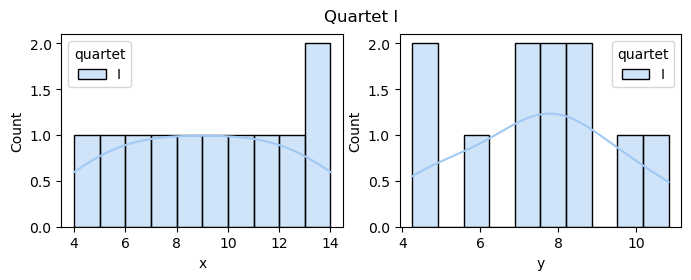

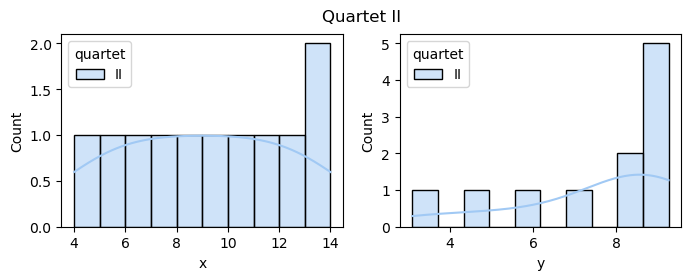

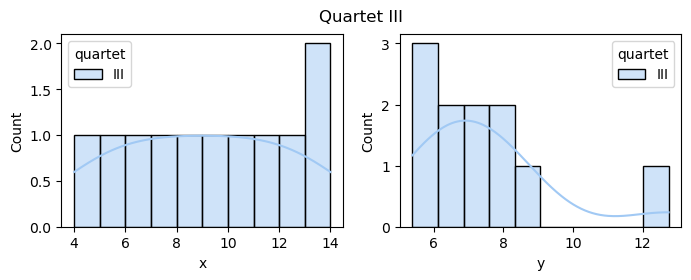

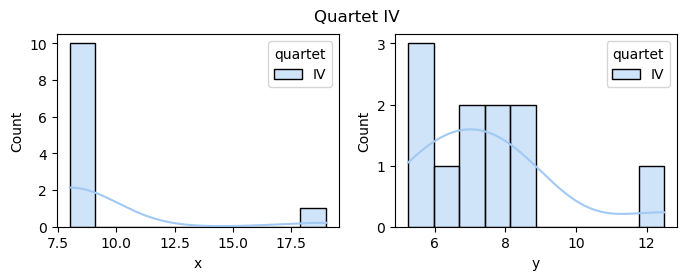

In [25]:
for quartet, g in quartets.groupby('quartet'):
    fig, axes = plt.subplots(1 , 2, figsize=(8, 2.5))
    sns.histplot(data=g, x="x", hue='quartet', ax=axes[0], palette=palette, bins=10, kde=True);
    sns.histplot(data=g, x="y", hue='quartet', ax=axes[1], palette=palette, bins=10, kde=True);
    plt.suptitle(f'Quartet {quartet}')

We can plot all quartets's two features `x` and `y` in two different plots moving out the subplots creation

C:\Users\Ticio\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Ticio\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Ticio\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Ticio\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

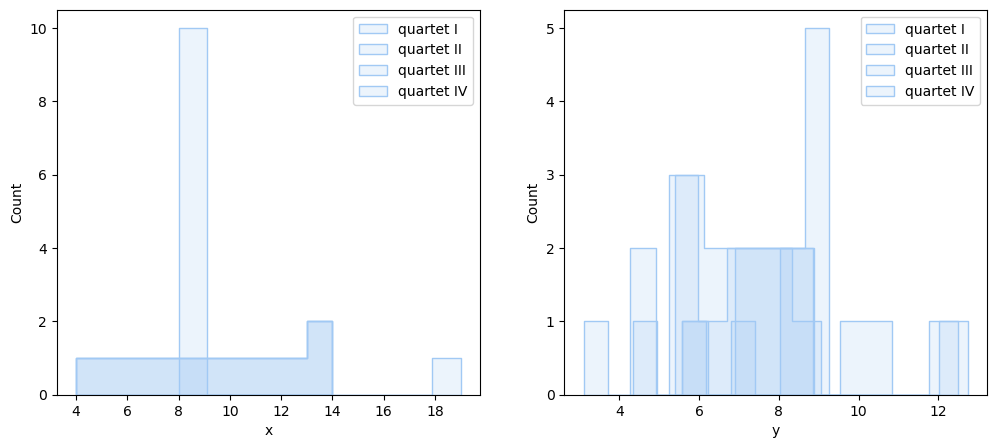

In [26]:
# The 'element' parameter defines the visual representation of the histogram statistic
# Possible values are 'bars' (default but too noisy when plotting so many features), 'step', 'poly'
element = 'step'
fig, axes = plt.subplots(1 , 2, figsize=(12, 5))
legends = []
for quartet, g in quartets.groupby('quartet'):
    legends.append(f'quartet {quartet}')
    sns.histplot(data=g, x="x", hue='quartet', ax=axes[0], palette=palette, bins=10, kde=False, alpha=.2, element=element);
    sns.histplot(data=g, x="y", hue='quartet', ax=axes[1], palette=palette, bins=10, kde=False, alpha=.2, element=element);
    
axes[0].legend(legends)
axes[1].legend(legends);

### FacetGrid

This is a powerful tool that can be used in combination with plotting methods from seaborn or even matplotlib to plot multiple subplots based on some conditional relationship. **A Facet Grid allows you to create a grid of subplots based on the values of one or more categorical variables**. Each subplot in the grid represents a subset of the data based on the values of these variables. This makes it easy to compare different subsets of the data and identify patterns or trends.

[`seaborn.FacetGrid()`](https://seaborn.pydata.org/generated/seaborn.FacetGrid.html): Multi-plot grid for plotting conditional relationships.

**Grid of histograms**

C:\Users\Ticio\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Ticio\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Ticio\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Ticio\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

C:\Users\Ticio\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Ticio\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Ticio\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Ticio\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

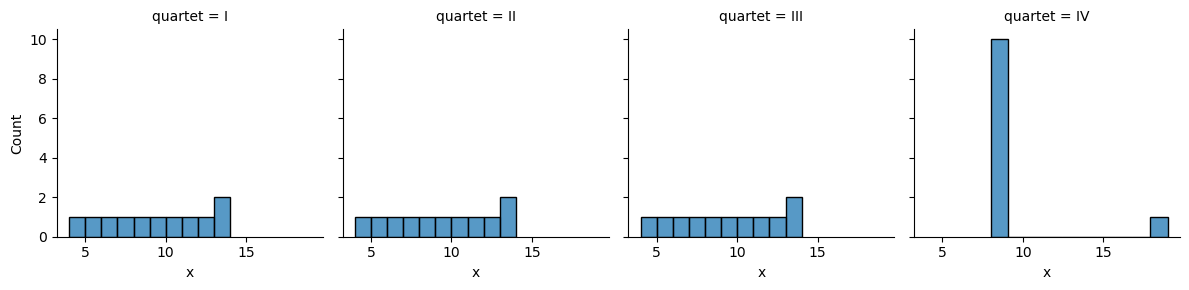

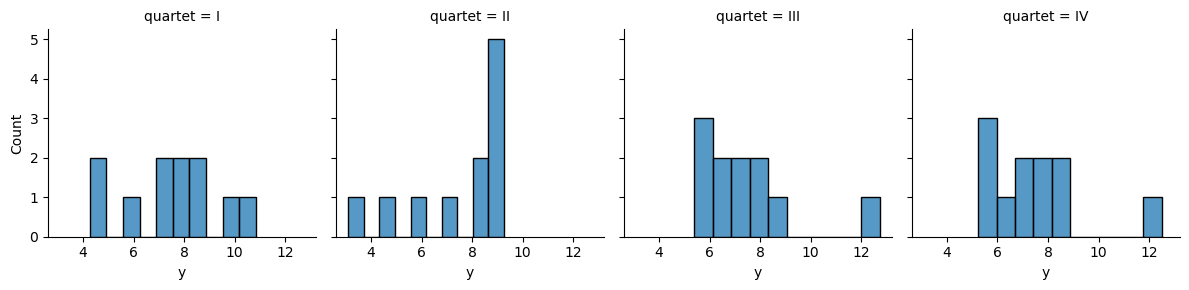

In [27]:
for feature in ['x', 'y']:
    # create the grid with condition quartet
    g = sns.FacetGrid(quartets, col="quartet", palette=palette, col_wrap=4)
    # for every condition we are going to create a subplot for the grid for column "feature"
    g.map(sns.histplot, feature, bins=10);
    
# col_wrap define the number of columns. Change the value to 3 and 2 to understand visually its behaviour

We can create one FacetGrid for all. For that we need to convert the dataframe to access values based on conditions.

In [28]:
melted = pd.melt(quartets, id_vars='quartet', var_name='variable', value_name='value')
melted

,quartet,variable,value
0,I,x,10.00
1,I,x,8.00
2,I,x,13.00
3,I,x,9.00
4,I,x,11.00
...,...,...,...
83,IV,y,5.25
84,IV,y,12.50
85,IV,y,5.56
86,IV,y,7.91


C:\Users\Ticio\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Ticio\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Ticio\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Ticio\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

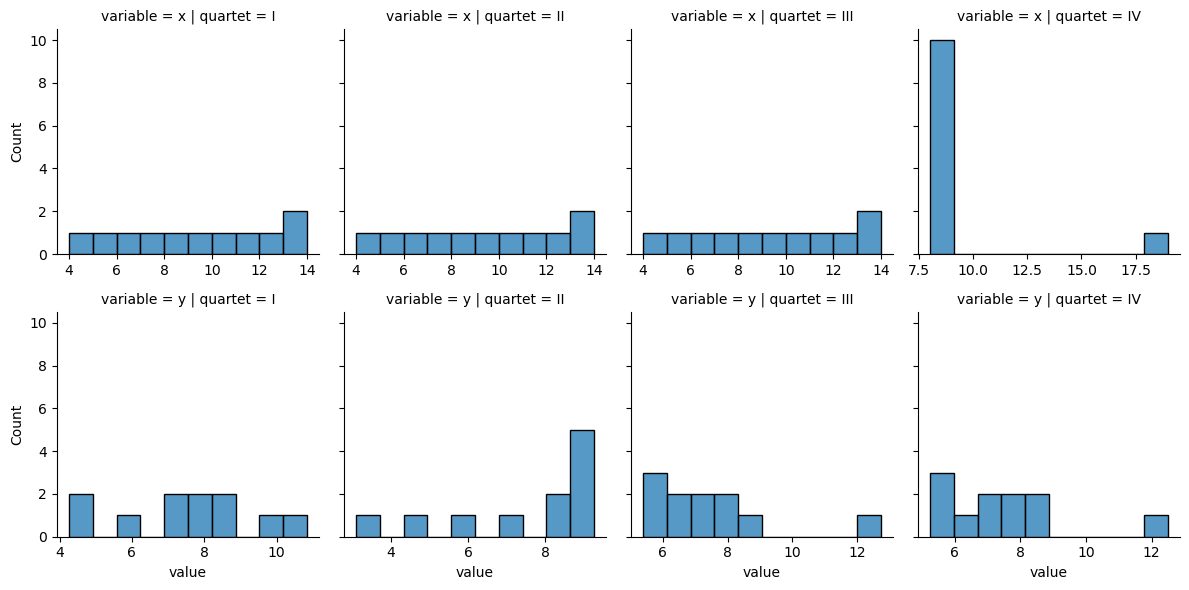

In [29]:
# create the grid with quartets as columns and variable as rows
g = sns.FacetGrid(melted, row="variable", col='quartet', palette=palette, sharex=False)
g.map(sns.histplot, 'value', bins=10);
# we need set sharex to False to avoid distorting shapes between rows (you can try changing it to True)

### Scatter plots
Knowing that we have `x` and `y` features, we can think about using other kind of helpful plots. Why not a scatter plot?

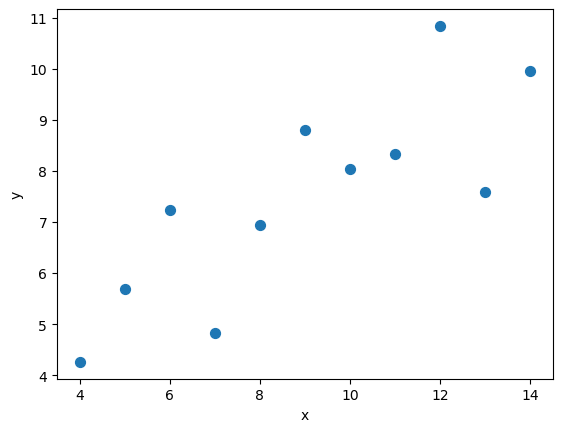

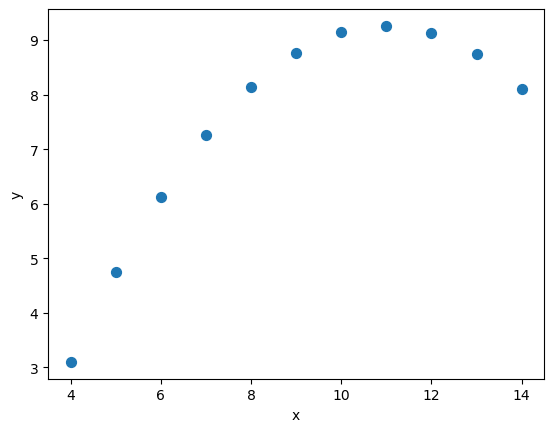

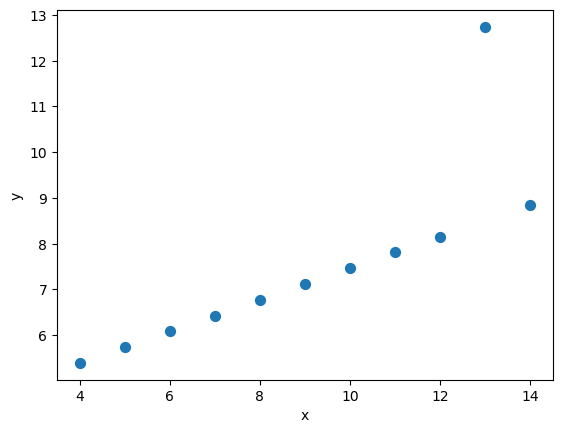

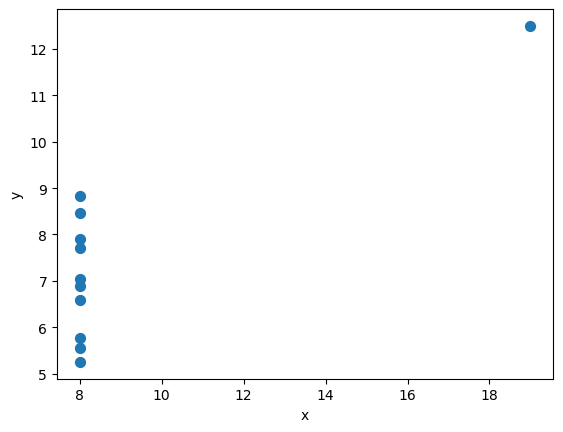

In [30]:
quartets.groupby('quartet').plot.scatter(x='x', y='y', s=50);

**Scatter plots with seaborn**

We can combine matplotlib with seaborn to improve the aesthetic.

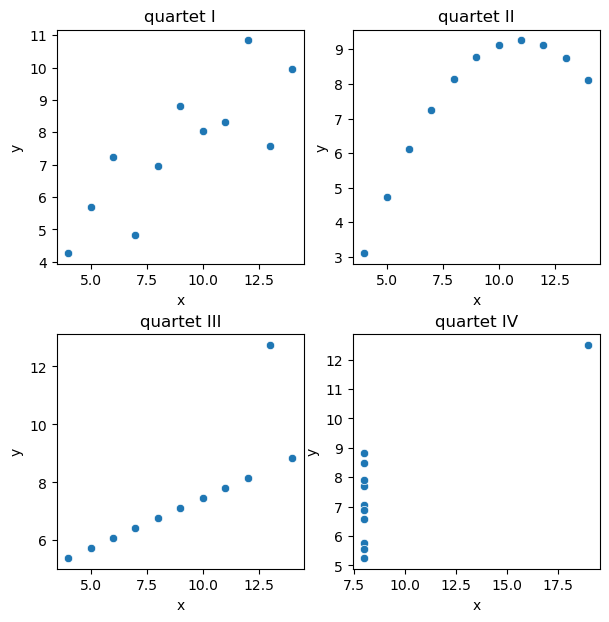

In [31]:
fig, axes = plt.subplots(2,2,figsize=(7,7))
axes = axes.flatten().tolist()
for quartet, g in quartets.groupby('quartet'):
    ax = axes.pop(0)
    sns.scatterplot(data=g, x='x', y='y', ax=ax)    
    ax.set_title(f'quartet {quartet}')
plt.subplots_adjust(hspace=0.3);

**Scatter plots with FacetGrid**

FacetGrid is great to avoid writting too many lines of matplotlib code. In this case we can force the grid to share x and y domain to simplify features domains comparison.

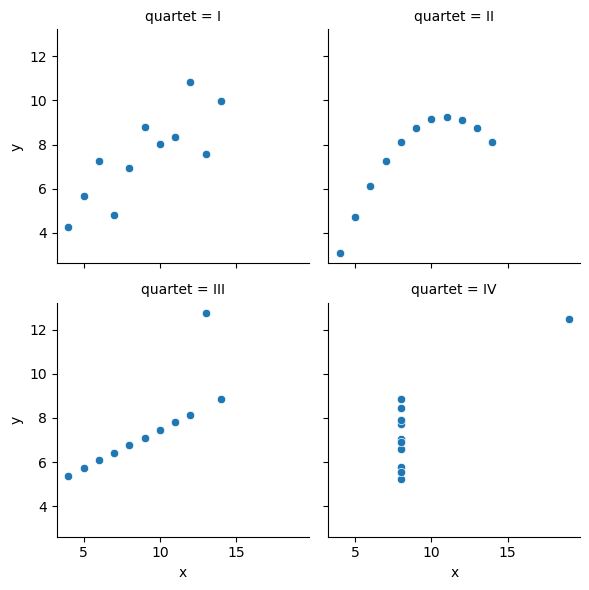

In [32]:
g = sns.FacetGrid(quartets, col='quartet', palette=palette, col_wrap=2, sharex=True, sharey=True)
g.map(sns.scatterplot, 'x', 'y');

### Line plots
We could also use a lineplot but to do that we need to know that dots should be ordered in the x axis.

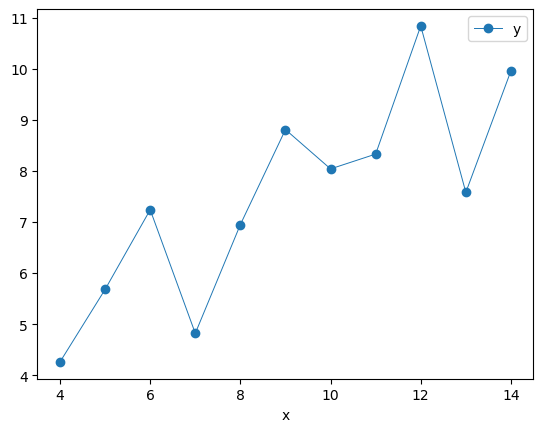

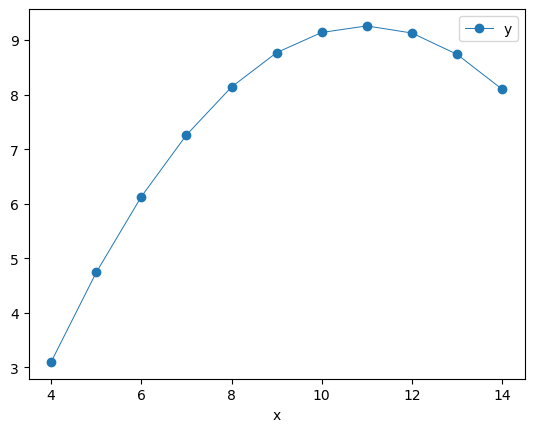

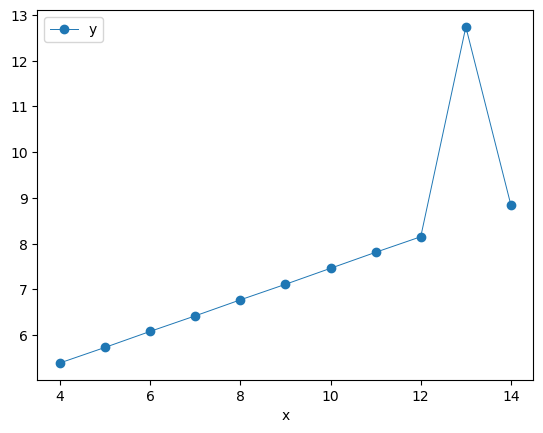

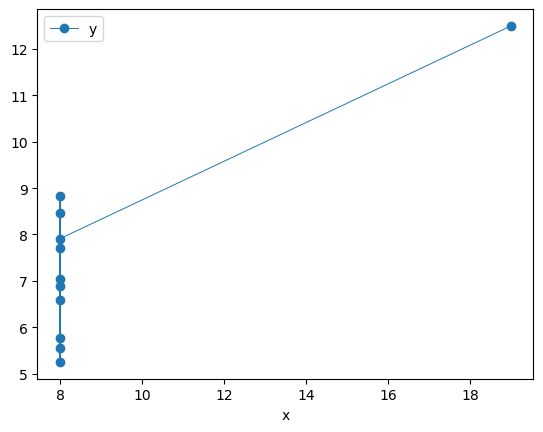

In [33]:
quartets.sort_values(by='x').groupby('quartet').plot(x='x', y='y', marker='o', lw=.7);

### All in one
We also can use matplotlib to plot all groups in the same plot

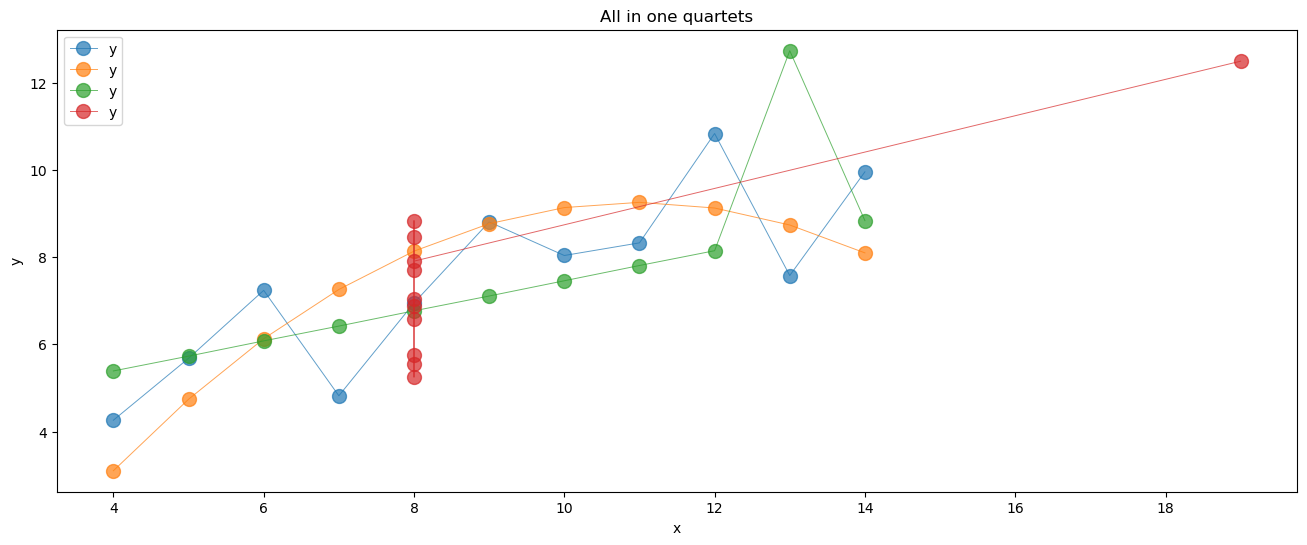

In [34]:
# create one figure of 1 x 1 size.
fig, ax = plt.subplots(1,1,figsize=(16,6))
# plot all 4 quartets in the same ax
quartets.sort_values(by='x').groupby('quartet').plot(x='x', y='y', marker='o', ms=10, lw=.7, alpha=.7, ax=ax)
plt.ylabel('y')
plt.title('All in one quartets');

### Lineplots with seaborn

[Seaborn.lineplot()](https://seaborn.pydata.org/generated/seaborn.lineplot.html) simplifies the creation of the same plot.

C:\Users\Ticio\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Ticio\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


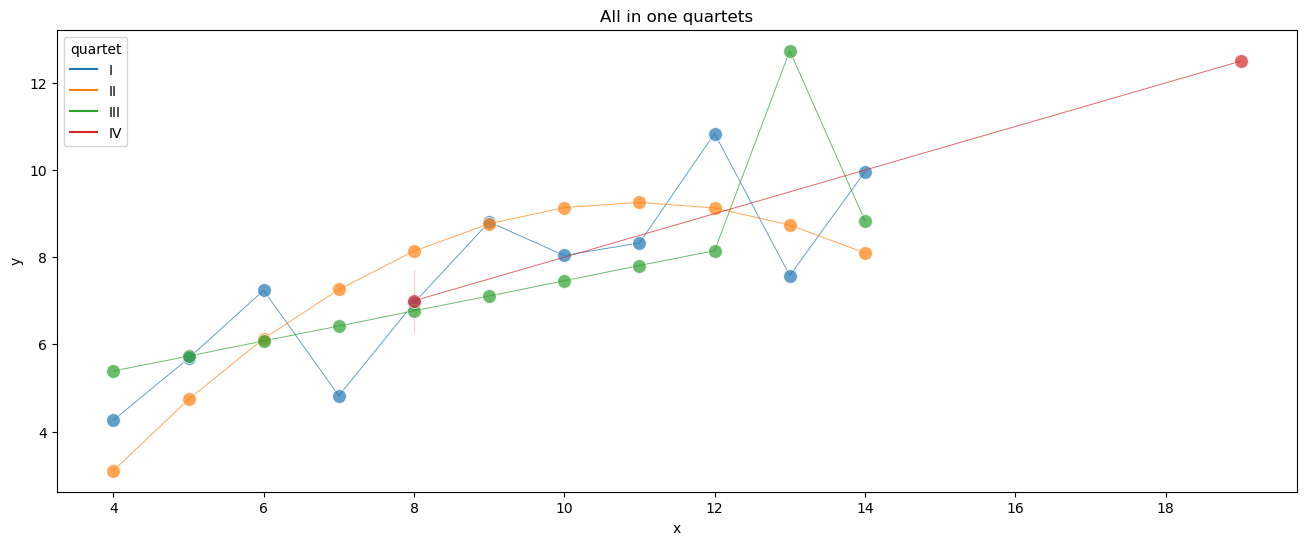

In [35]:
fig, ax = plt.subplots(1,1,figsize=(16,6))
sns.lineplot(data=quartets, x='x', y='y', hue='quartet', marker='o', ms=10, lw=.7, alpha=.7, ax=ax)
plt.title('All in one quartets');

And we can plot all quartets together (removing the conditional `hue` for seaborn)

C:\Users\Ticio\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Ticio\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


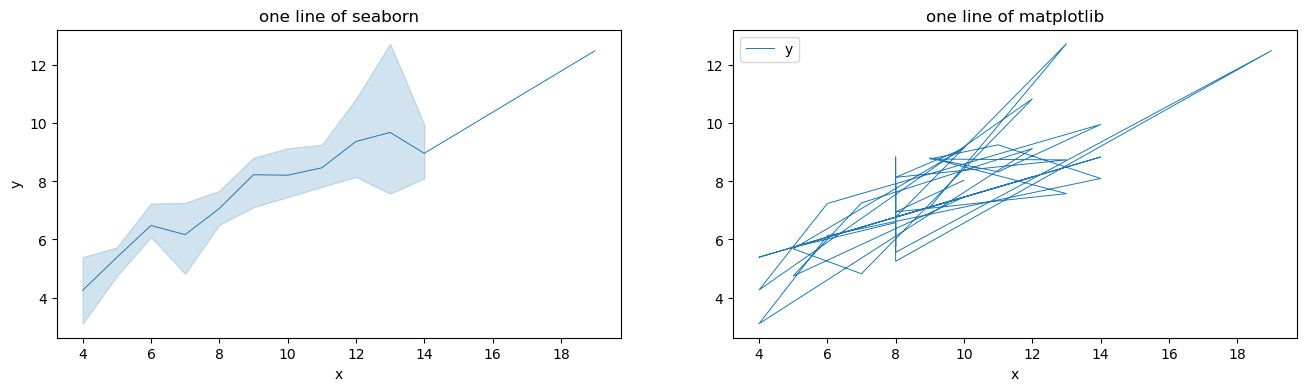

In [36]:
fig, axes = plt.subplots(1,2,figsize=(16,4))
sns.lineplot(data=quartets, x='x', y='y', lw=.7, ax=axes[0])
axes[0].set_title('one line of seaborn')
quartets.plot(x='x', y='y', lw=.7, ax=axes[1])
axes[1].set_title('one line of matplotlib');

#### 🗒 Exercise

Seaborn is built on matplotlib, so modifying the function parameters should let you arrive to the same plot. Modify the parameters of the lineplot() Seaborn function such that the two plots are visually similar.

## Let´s use a different dataset

We now load another dataset that consists of the marks secured by the students in various subjects. The aim is to understand the influence of the parents background, test preparation, etc. on students performance.

Source: https://www.kaggle.com/spscientist/students-performance-in-exams  
Original source generator: http://roycekimmons.com/tools/generated_data/exams

If you go to the original source you will find this is a fictitious dataset created specifically for data science training purposes.

In [13]:
df = pd.read_csv('data/StudentsPerformance.csv').rename(
        columns={
            'race/ethnicity': 'group',
            'parental level of education': 'parental',
            'test preparation course': 'course',
            'math score': 'math',
            'reading score': 'reading',
            'writing score': 'writing'
        }
    )

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   gender    1000 non-null   object
 1   group     1000 non-null   object
 2   parental  1000 non-null   object
 3   lunch     1000 non-null   object
 4   course    1000 non-null   object
 5   math      1000 non-null   int64 
 6   reading   1000 non-null   int64 
 7   writing   1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [15]:
df.head()

,gender,group,parental,lunch,course,math,reading,writing
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [16]:
df['group'].unique().tolist()

['group B', 'group C', 'group A', 'group D', 'group E']

### Let's simplify the dataframe

We can simplify the group values to the group letter

**Series.str**

[`Series.str`](https://pandas.pydata.org/docs/reference/api/pandas.Series.str.html): Vectorized string functions for Series and Index.

In [17]:
df['group'] = df['group'].str[-1]
df['group'].unique().tolist()

['B', 'C', 'A', 'D', 'E']

In [18]:
df.head()

,gender,group,parental,lunch,course,math,reading,writing
0,female,B,bachelor's degree,standard,none,72,72,74
1,female,C,some college,standard,completed,69,90,88
2,female,B,master's degree,standard,none,90,95,93
3,male,A,associate's degree,free/reduced,none,47,57,44
4,male,C,some college,standard,none,76,78,75


In [19]:
df['course'].unique()

array(['none', 'completed'], dtype=object)

**Series.apply**

[`Series.apply`](https://pandas.pydata.org/docs/reference/api/pandas.Series.apply.html): Invoke function on values of Series.

```python
Series.apply(func, convert_dtype=True, args=(), **kwargs)
```

In [20]:
# we verify that we have never change this column values yet
if 'completed' in df['course'].unique().tolist():
    df['course'] = df['course'].apply(lambda x: 1 if x == 'completed' else 0)

# we can change the column values type to boolean
df['course'] = df['course'].astype(bool)
df['course'].unique()

array([False,  True])

In [21]:
df.head()

,gender,group,parental,lunch,course,math,reading,writing
0,female,B,bachelor's degree,standard,False,72,72,74
1,female,C,some college,standard,True,69,90,88
2,female,B,master's degree,standard,False,90,95,93
3,male,A,associate's degree,free/reduced,False,47,57,44
4,male,C,some college,standard,False,76,78,75


Are there missing values?

In [22]:
df.isna().sum()

gender      0
group       0
parental    0
lunch       0
course      0
math        0
reading     0
writing     0
dtype: int64

None of the column series present missing values

**Some questions:**
- Does gender affect math scores? 
- Does reading and writing scores affect math scores? 
- Do math scores affect reading and writing scores? 
- Does a group perform better at math than the rest?
- Does parental level education affect math scores?

In [23]:
df[['reading','math']].sample(5)

,reading,math
87,71,71
343,72,67
990,81,86
484,52,49
939,68,77


In [24]:
df[['reading','math']].describe()

,reading,math
count,1000.000000,1000.00000
mean,69.169000,66.08900
std,14.600192,15.16308
min,17.000000,0.00000
25%,59.000000,57.00000
50%,70.000000,66.00000
75%,79.000000,77.00000
max,100.000000,100.00000


It's not common at all to see a zero on scores. Here we see a 0 found at math

In [25]:
df[df['math'] == 0]

,gender,group,parental,lunch,course,math,reading,writing
59,female,C,some high school,free/reduced,False,0,17,10


Does this sample look possible? Why?

#### Histograms for our selected variables

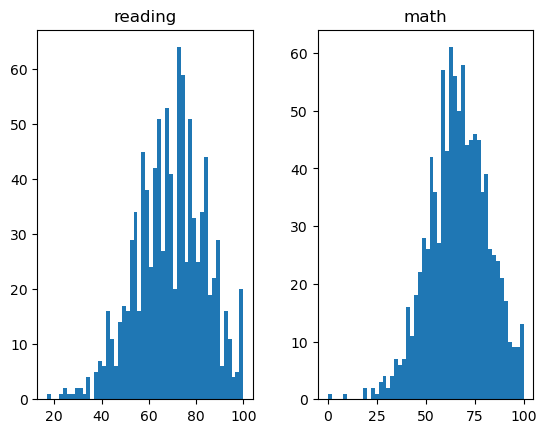

In [26]:
df[['reading', 'math']].hist(bins=50, grid=False);

#### Histograms for our selected variables (seaborn)

[seaborn.histplot()](https://seaborn.pydata.org/generated/seaborn.histplot.html)

We can plot histogram in different plots using matplotlib subplots

c:\Users\Ticio\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Ticio\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


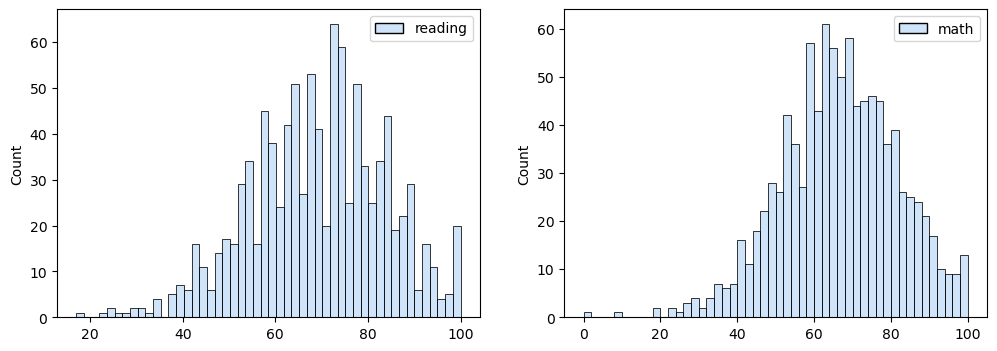

In [27]:
plt.figure(figsize=(12,4))
sns.histplot(df[['reading']], bins=50, ax=plt.subplot(121), palette=palette)
sns.histplot(df[['math']], bins=50, ax=plt.subplot(122), palette=palette);

But knowing that by default sns.histplot merges all features into the same plot, it could be simpler

c:\Users\Ticio\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


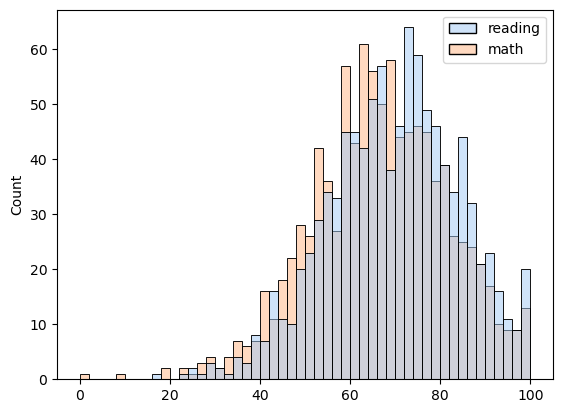

In [28]:
sns.histplot(df[['reading', 'math']], bins=50, palette=palette);

### Kernel Density Estimate
A Kernel Density Estimate (KDE) plot is a non-parametric way to estimate the probability density function of a continuous random variable. It provides a smooth, continuous representation of the underlying distribution of data, similar to a histogram but without discretizing the data into bins.

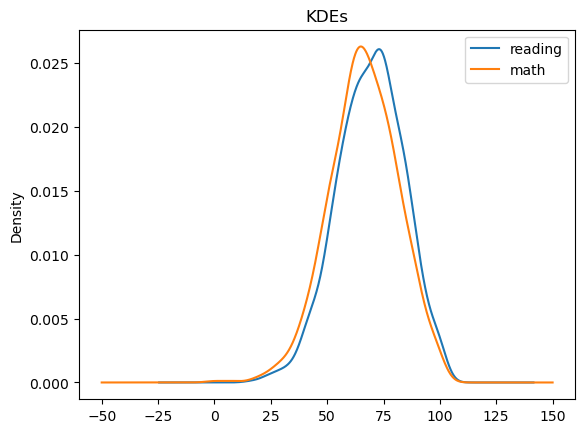

In [29]:
df[['reading', 'math']].plot.kde()
plt.title('KDEs');

Seaborn comes with the method [`seaborn.kdeplot()`](https://seaborn.pydata.org/generated/seaborn.kdeplot.html) to create Kernel Density Plots but we can just set the histplot params kde to True to combine them.

c:\Users\Ticio\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


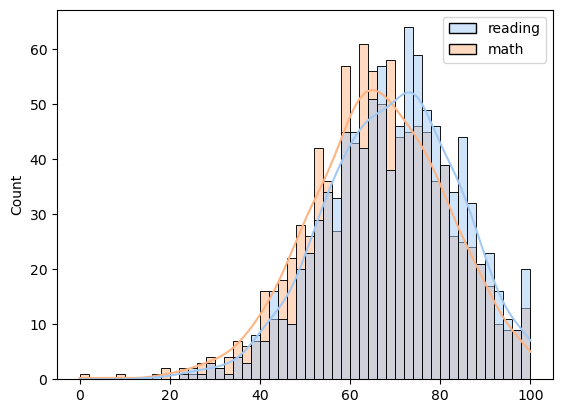

In [30]:
sns.histplot(df[['reading', 'math']], bins=50, kde=True, palette=palette);

### BoxPlot

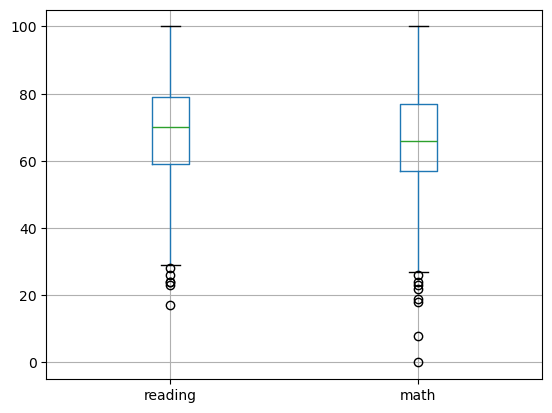

In [31]:
df[['reading', 'math']].boxplot();

At first glance distributions looks similar as one could expect. Math scores distribution looks a bit shifted down.

**Boxplots with seaborn**

[`seanborn.boxplot()`](https://seaborn.pydata.org/generated/seaborn.boxplot.html)

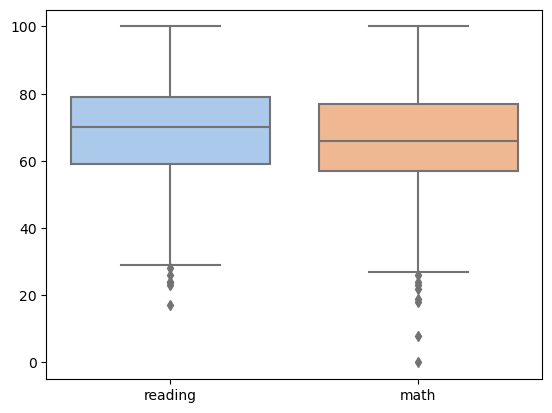

In [26]:
sns.boxplot(data=df[['reading', 'math']], palette=palette);

#### Boxplot on the whole dataframe

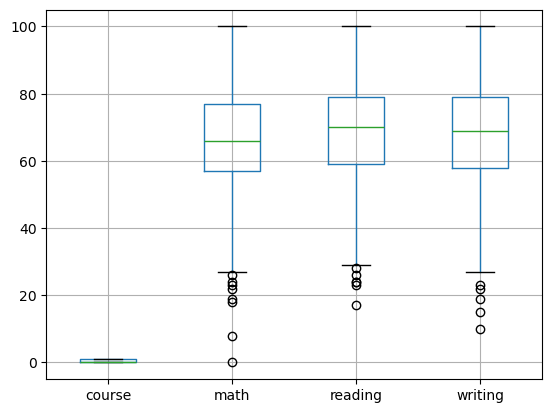

In [30]:
df.boxplot();

### Boxenplots or Letter values

A boxenplot, also known as a letter-value plot, is a variation of a box plot that provides additional information about the shape of the distribution, particularly in the tails. It is similar to a box plot but with more quantiles, resulting in a more detailed representation of the data distribution.

[`seaborn.boxenplot()`](https://seaborn.pydata.org/generated/seaborn.boxenplot.html)

c:\Users\Ticio\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Ticio\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


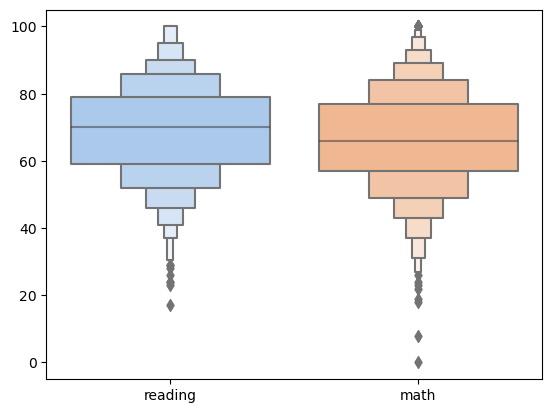

In [32]:
sns.boxenplot(data=df[['reading', 'math']], palette=palette);

### Violinplots
A violin plot is a type of data visualization that combines aspects of a box plot and a kernel density plot. It is used to visualize the distribution of a continuous variable or numerical data across different categories or groups.

[`seaborn.violinplot()`](https://seaborn.pydata.org/generated/seaborn.violinplot.html)

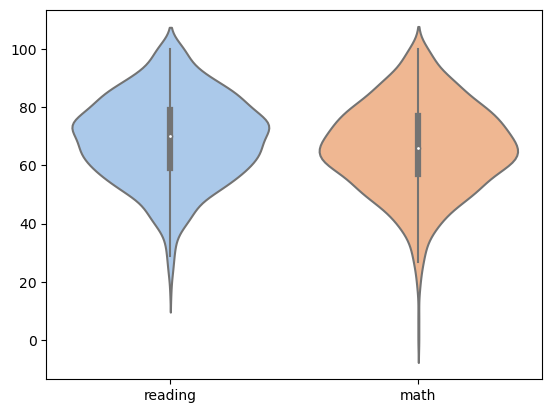

In [33]:
sns.violinplot(data=df[['reading', 'math']], palette=palette);



What about the relation between the scores? Do they interact?
#### Scatter to the rescue

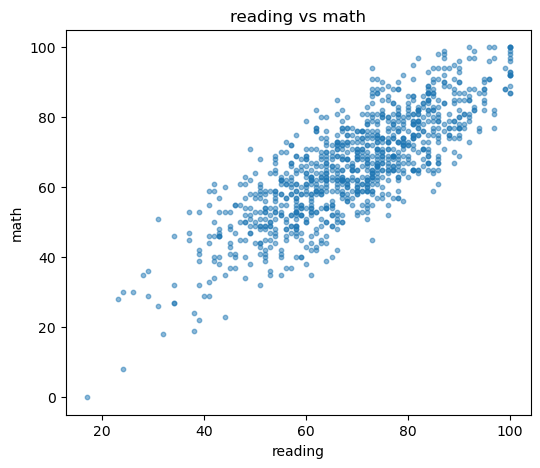

In [34]:
df.plot.scatter(x='reading', y='math', s=10, alpha=.5, figsize=(6,5))
plt.title('reading vs math');

There is visual correlation between these variables.

### Correlation
Pandas has implemented a method named `corr()`.

`DataFrame.corr()`: Compute pairwise correlation of columns, excluding NA/null values.
```python
DataFrame.corr(method='pearson', min_periods=1)
```


In [35]:
df[['reading', 'math']].corr()

,reading,math
reading,1.00000,0.81758
math,0.81758,1.00000


Pandas corr() offers different correlation methods. In most cases `pearson` or/and `spearman` are the methods to go.

In [36]:
for method in ['pearson', 'kendall', 'spearman']:
    # iloc is used to access value at first row second column.
    corr = df[['reading', 'math']].corr(method=method).iloc[0,1]
    print(f'{method} correlation: {corr:.3f}')

pearson correlation: 0.818
kendall correlation: 0.617
spearman correlation: 0.804


We've confirmed there is a strong (linear) correlation between reading and math scores. Each variable could work as a proxy of the other variable.

#### Correlation between all variables

In [37]:
df.corr(numeric_only=True)

,course,math,reading,writing
course,1.000000,0.177702,0.241780,0.312946
math,0.177702,1.000000,0.817580,0.802642
reading,0.241780,0.817580,1.000000,0.954598
writing,0.312946,0.802642,0.954598,1.000000


Reading and writing have a really strong correlation.

**Of course one could use plots**

<Axes: xlabel='math', ylabel='reading'>

Text(0.5, 1.0, 'math vs reading')

<Axes: xlabel='reading', ylabel='writing'>

Text(0.5, 1.0, 'reading vs writing')

<Axes: xlabel='writing', ylabel='math'>

Text(0.5, 1.0, 'writing vs math')

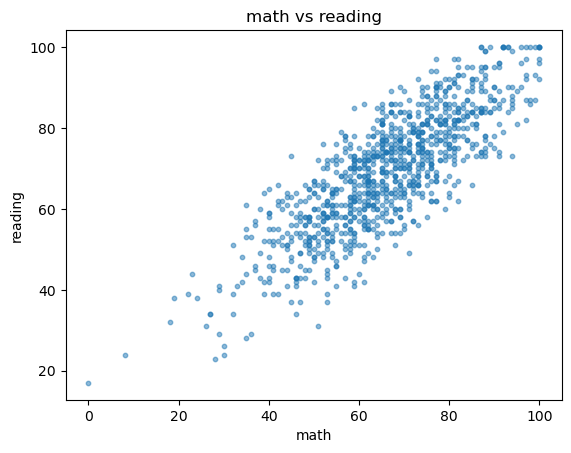

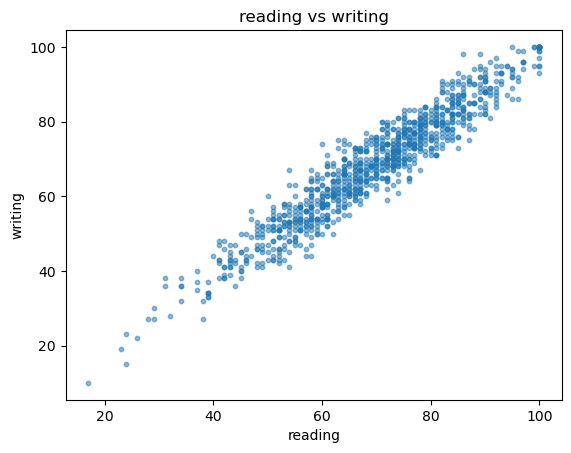

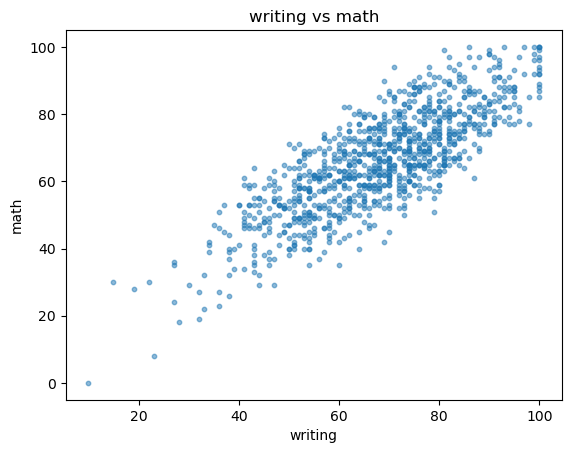

In [38]:
cols = ['math', 'reading', 'writing']
for i, c1 in enumerate(cols):
    c2 = cols[i+1] if i < len(cols)-1 else cols[0]
    df.plot.scatter(x=c1, y=c2, s=10, alpha=.5)
    plt.title(f'{c1} vs {c2}')

**Scatter plots with seaborn**

Seaborn comes with [`seaborn.scatterplot()`](https://seaborn.pydata.org/generated/seaborn.scatterplot.html).

c:\Users\Ticio\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Ticio\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Ticio\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


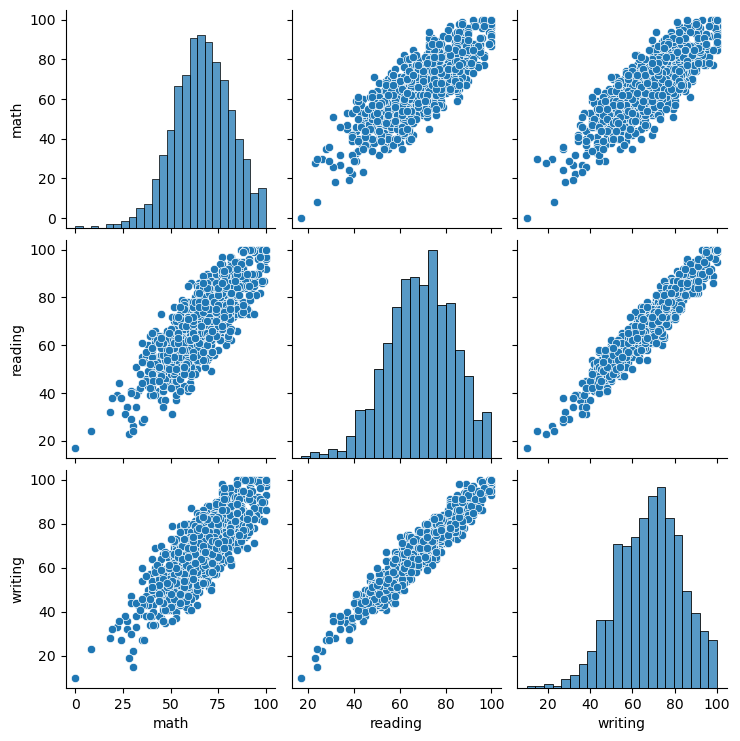

In [39]:
sns.pairplot(df.select_dtypes('number'));

### Pie plot

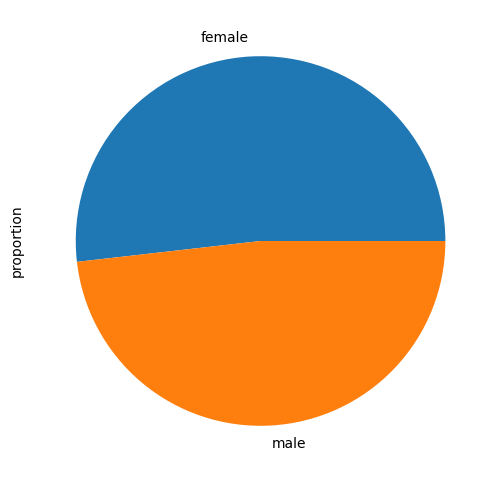

In [40]:
df['gender'].value_counts(normalize=True).plot.pie(figsize=(6,6));

Seaborn doesn't come with a method to plot pie plots

### Heatmap

[`seaborn.heatmap()`](https://seaborn.pydata.org/generated/seaborn.heatmap.html): Plot rectangular data as a color-encoded matrix.

Heatmap is a great tool for plotting features' correlations


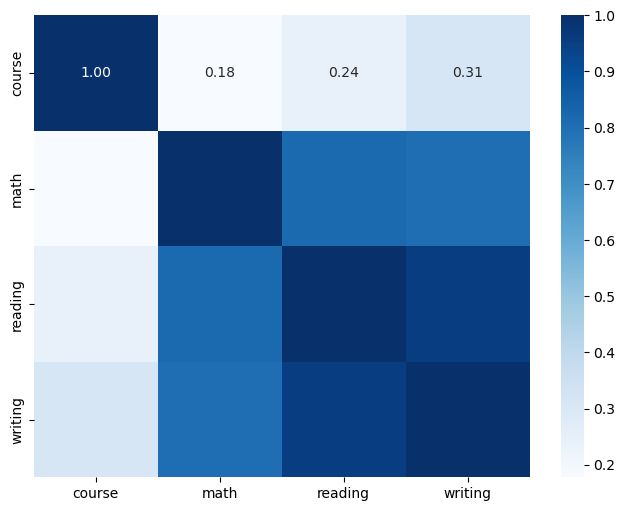

In [42]:
fig, ax = plt.subplots(1, 1, figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt='.2f', cmap='Blues', ax=ax);

### We now want to compare the scores of the various skills by gender

In [76]:
df.head()

,gender,group,parental,lunch,course,math,reading,writing,approved
0,female,B,bachelor's degree,standard,False,72,72,74,1
1,female,C,some college,standard,True,69,90,88,1
2,female,B,master's degree,standard,False,90,95,93,1
3,male,A,associate's degree,free/reduced,False,47,57,44,1
4,male,C,some college,standard,False,76,78,75,1


In [77]:
df.groupby('gender').mean(numeric_only=True)

,course,math,reading,writing,approved
gender,,,,,
female,0.355212,63.633205,72.608108,72.467181,0.940154
male,0.360996,68.728216,65.473029,63.311203,0.981328


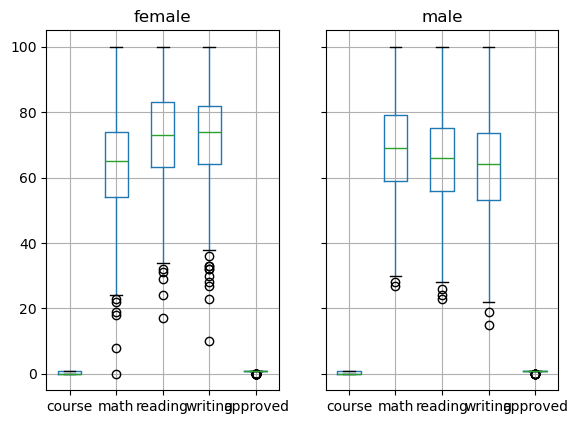

In [78]:
df.groupby('gender').boxplot();

pandas.melt() is a powerful method to unpivot a dataframe. We are going to use it to simplify use of some seaborn plots.

In [79]:
score_cols = df.select_dtypes('number').columns.tolist()
id_vars = [c for c in df.columns if c not in score_cols]
score_cols, id_vars
melted = pd.melt(df, id_vars=id_vars, var_name='skill', value_name='score')
melted.head()

(['math', 'reading', 'writing', 'approved'],
 ['gender', 'group', 'parental', 'lunch', 'course'])

,gender,group,parental,lunch,course,skill,score
0,female,B,bachelor's degree,standard,False,math,72
1,female,C,some college,standard,True,math,69
2,female,B,master's degree,standard,False,math,90
3,male,A,associate's degree,free/reduced,False,math,47
4,male,C,some college,standard,False,math,76


When you make things easier to read for seaborn, seaborn will make the plots easier to read for you.

c:\Users\Ticio\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Ticio\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Ticio\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Ticio\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN befo

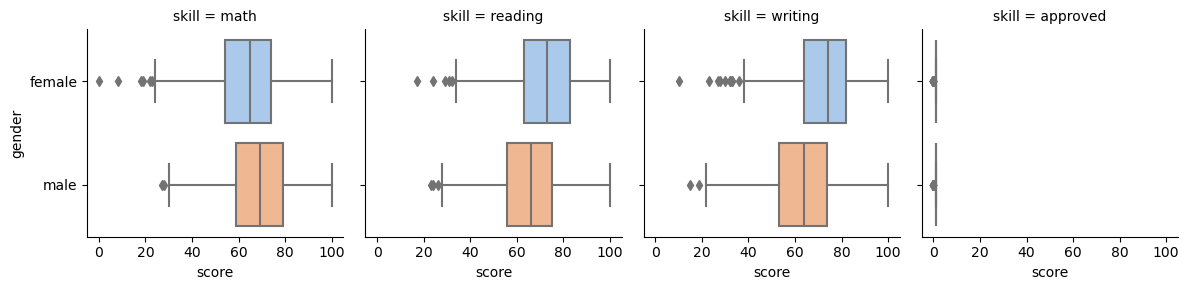

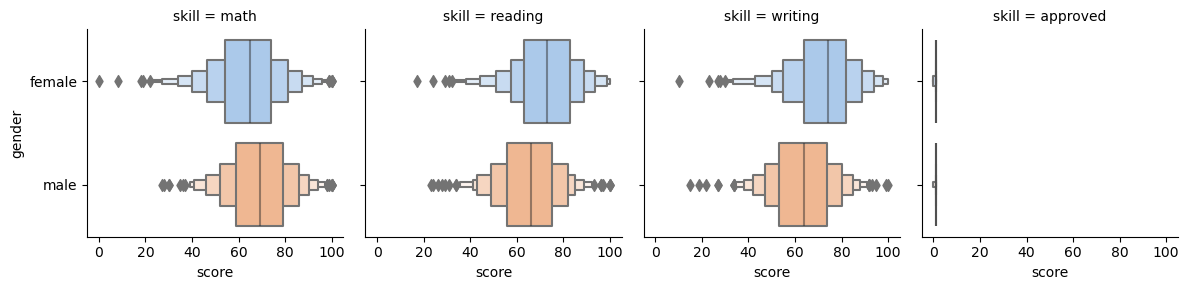

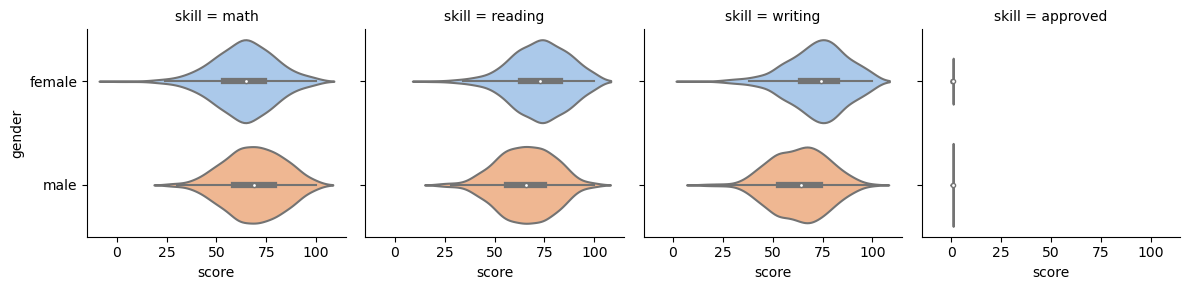

In [80]:
for func in [sns.boxplot, sns.boxenplot, sns.violinplot]:
    g = sns.FacetGrid(melted, col="skill")
    g.map(func, 'score', 'gender', order=None, palette=palette);

c:\Users\Ticio\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Ticio\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Ticio\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Ticio\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

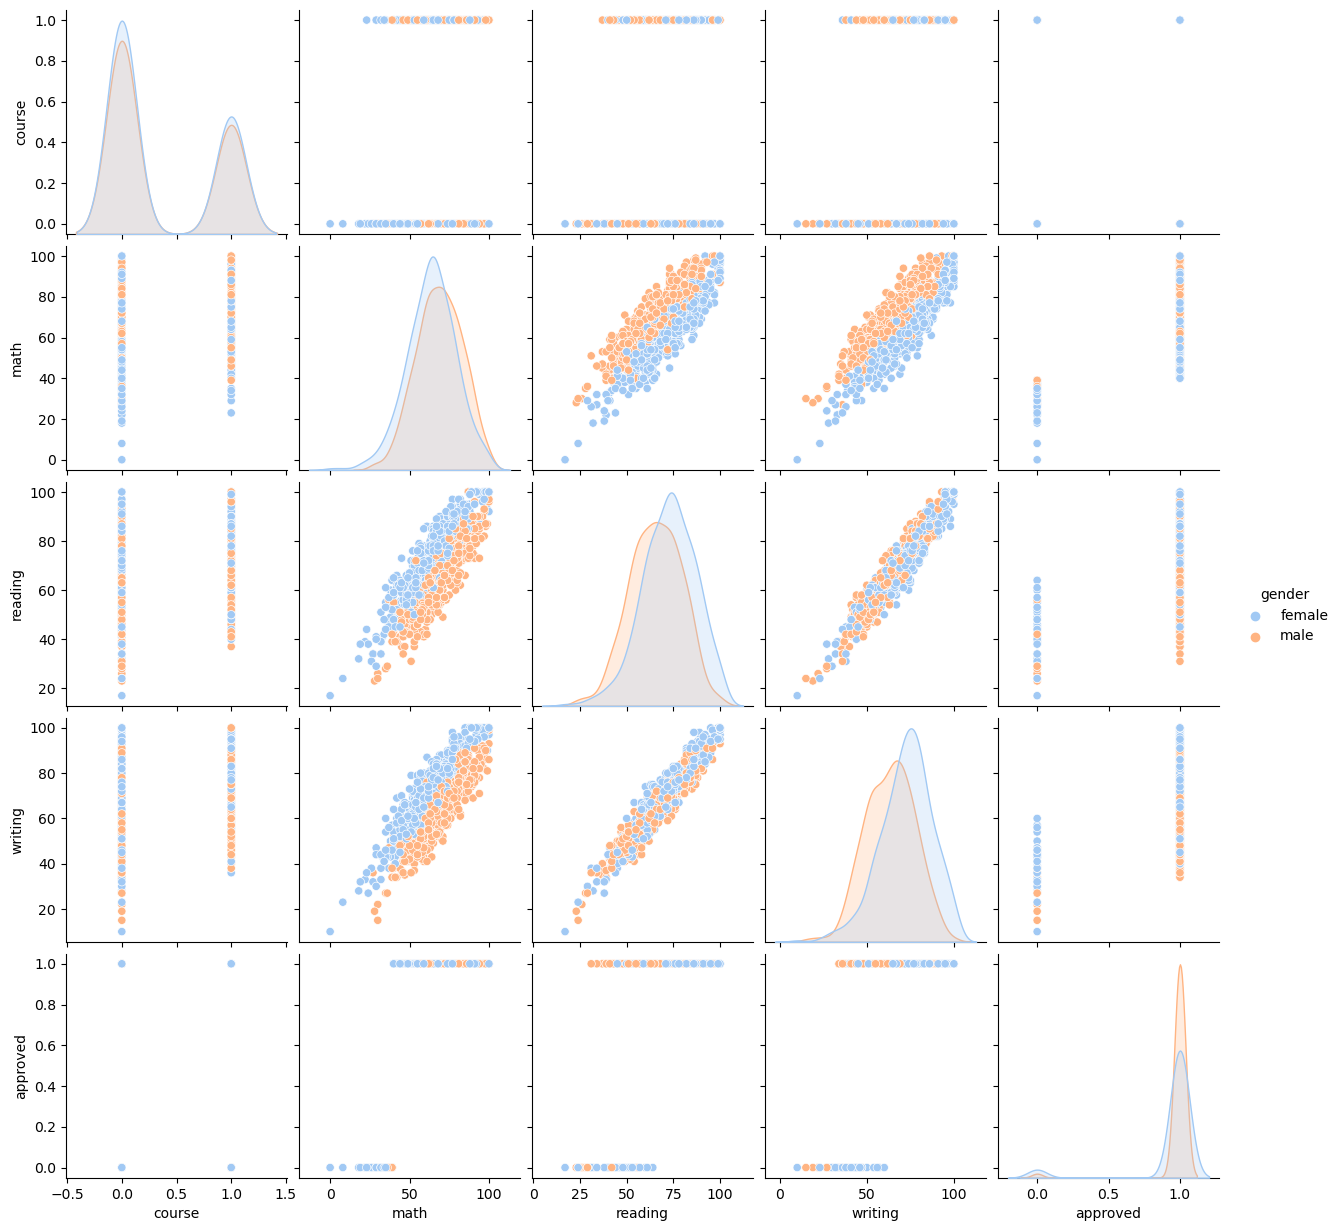

In [81]:
sns.pairplot(df, palette=palette, hue='gender');

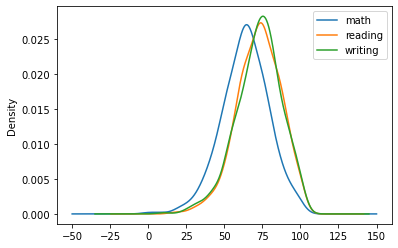

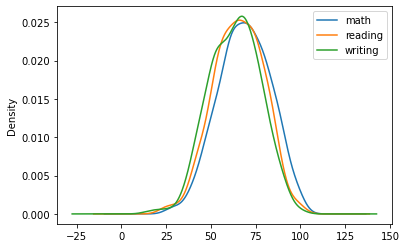

In [74]:
df.groupby('gender').plot.kde();

In [82]:
df['is_female'] = df['gender'].apply(lambda x: 1 if x == 'female' else 0)
df['is_female'] = df['is_female'].astype(float)

df['is_male'] = df['gender'].apply(lambda x: 1 if x == 'male' else 0)
df['is_male'] = df['is_male'].astype(float)

df.head()

,gender,group,parental,lunch,course,math,reading,writing,approved,is_female,is_male
0,female,B,bachelor's degree,standard,False,72,72,74,1,1.0,0.0
1,female,C,some college,standard,True,69,90,88,1,1.0,0.0
2,female,B,master's degree,standard,False,90,95,93,1,1.0,0.0
3,male,A,associate's degree,free/reduced,False,47,57,44,1,0.0,1.0
4,male,C,some college,standard,False,76,78,75,1,0.0,1.0


Instead of looking at correlation between all variables we want to see how this new variables `is_female` correlates with the scores. Pandas gives us the method `DataFrame.corrwith()` for this kind of cases.

In [83]:
df[['math', 'reading', 'writing']].corrwith(df['is_female'])

math      -0.167982
reading    0.244313
writing    0.301225
dtype: float64

In [84]:
df[['math', 'reading', 'writing']].corrwith(df['is_male'])

math       0.167982
reading   -0.244313
writing   -0.301225
dtype: float64

### Who will approve?

In [85]:
approval_threshold = 40

In [44]:
df['approved'] = df['math'] >= approval_threshold
df['approved'] = df['approved'].astype(int)
df.head()

,gender,group,parental,lunch,course,math,reading,writing,approved
0,female,B,bachelor's degree,standard,False,72,72,74,1
1,female,C,some college,standard,True,69,90,88,1
2,female,B,master's degree,standard,False,90,95,93,1
3,male,A,associate's degree,free/reduced,False,47,57,44,1
4,male,C,some college,standard,False,76,78,75,1


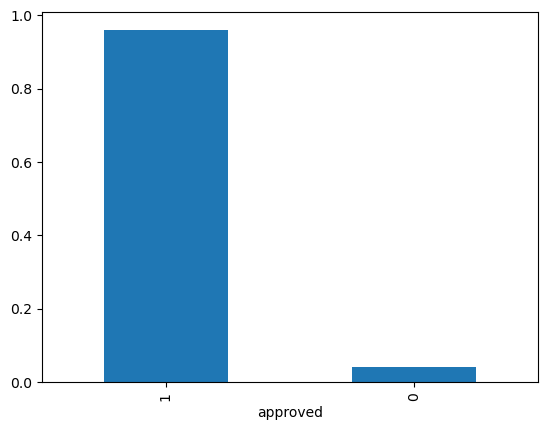

In [45]:
df['approved'].value_counts(normalize=True).plot.bar();

Seaborn has a method for plotting counts of feature's values.

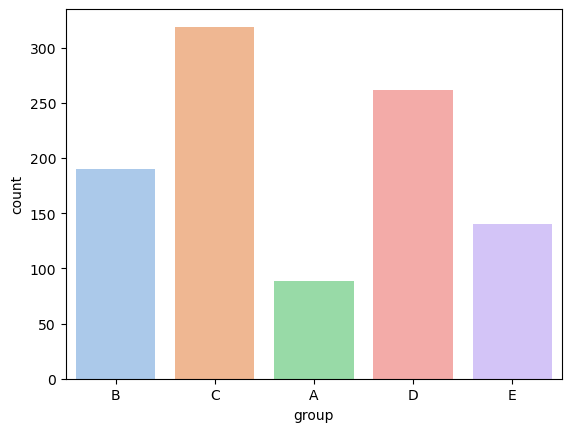

In [46]:
sns.countplot(data=df, x='group', palette=palette);

The problem is that the countplot method doesn't *count* with a normalize parameter. So trying to plot a normalized version is not as simple as when using pandas (```Series.value_counts(normalize=True).plot.bar()```)

In [60]:
df['approved'].value_counts(normalize=True).to_frame()

,proportion
approved,
1,0.96
0,0.04


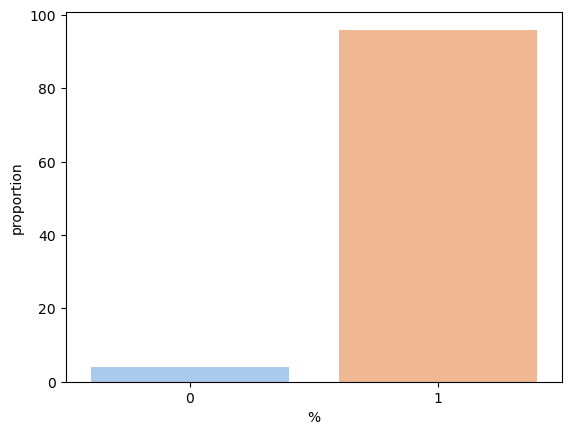

In [61]:
sns.barplot(data=((df['approved'].value_counts(normalize=True)*100).to_frame()
                     .reset_index().rename(columns={'approved': '%', 'index': 'approved'})),
            x='%',
            y='proportion',
            palette=palette);

In [62]:
df[['gender', 'course', 'reading', 'writing', 'math']].groupby('gender').corrwith(df['approved'])

,course,reading,writing,math
gender,,,,
female,0.102233,0.513812,0.549594,0.548292
male,0.071767,0.317447,0.331337,0.339371


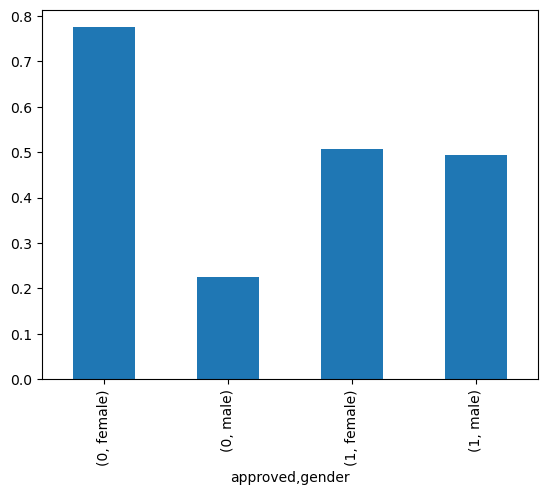

In [63]:
df.groupby('approved')['gender'].value_counts(normalize=True).plot.bar();

We will try to do the same plot with seaborn

In [65]:
df.groupby('approved')['gender'].value_counts(normalize=True).to_frame()

proportion
approved gender            
0        female    0.775000
         male      0.225000
1        female    0.507292
         male      0.492708

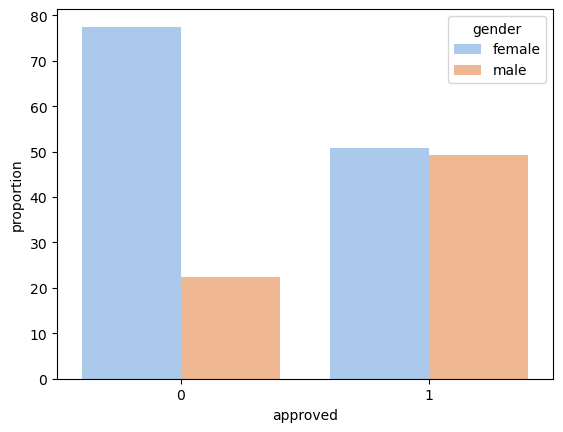

In [66]:
tmp = (df.groupby('approved')['gender'].value_counts(normalize=True).to_frame().rename(columns={'gender': '%'})*100).reset_index()
sns.barplot(data=tmp, x='approved', y='proportion', hue='gender', palette=palette);

<a id='pandas_seaborn_matplotlib'></a>
## Pandas, Seaborn or Matplotlib?

When plotting you can think of using one of these four approaches:

- Pandas
- Pandas + Matplotlib
- Pandas + Seaborn
- Pandas + Seaborn + Matplotlib

**Pandas**  
- Learning: easy
- Default Visual: bad
- Custom Visual: regular
- TIP: just knowing what are the plotting methods implemented in pandas is enough to start plotting many things to extract information for you (but maybe not for a presentation).

**Pandas + Matplotlib**  
- Learning: difficult
- Default Visual: regular
- Custom Visual: excellent but tricky (it's all about learning matplotlib, not easy to start from scratch)
- TIP: Think the plot you want and then using DataFrame.groupby or some condition applied to the dataframe will be enough to feed your plots.

**Pandas + Seaborn**   
- Learning: good
- Default Visual: good
- Custom Visual: very good
- TIP: Seaborn is almost about preparing a DataFrame to feed the seaborn plot you are looking for. So you need to learn about Seaborn's available plots and probably expend some time learning pandas methods like `melt` and `pivot` to transform the dataframe in an input kind of the ones seaborn likes.

**Pandas + Matplotlib + Seaborn**   
- Learning: difficult
- Default Visual: good
- Custom Visual: excellent
- TIP: Sky is the limit. Remember that seaborn was built on matplotlib.

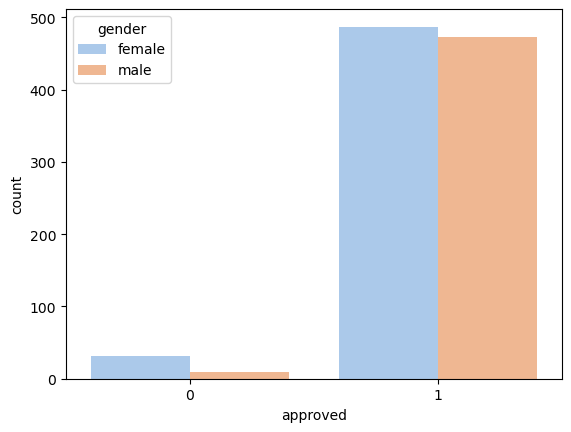

In [67]:
sns.countplot(data=df, x='approved', hue='gender', palette=palette);

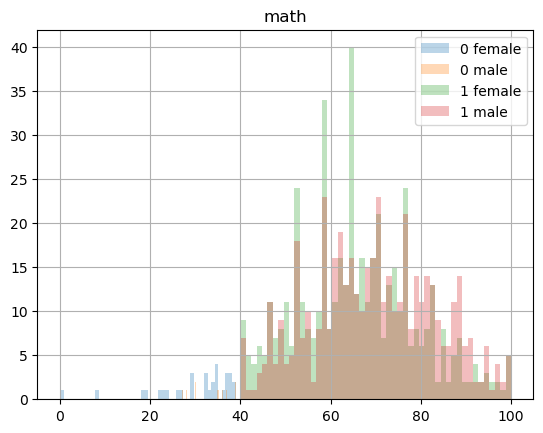

In [68]:
ax = plt.subplot()
for group, g in df.groupby(['approved','gender']):
    g[['math']].hist(bins=50, ax=ax, alpha=.3, label=f'{group[0]} {group[1]}');
plt.legend();

To do the same plot with seaborn we will need to convert the dataframe like the melted one and add some new column that represents a combination of gender and approved. Sometimes it's better to look for alternatives that let us do the same analysis without too much coding.

c:\Users\Ticio\anaconda3\Lib\site-packages\seaborn\axisgrid.py:848: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(*plot_args, **plot_kwargs)
c:\Users\Ticio\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Ticio\anaconda3\Lib\site-packages\seaborn\axisgrid.py:848: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(*plot_args, **plot_kwargs)
c:\Users\Ticio\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Ticio\anaconda3\Lib\site-packages\seaborn\axisgrid.py:848: UserWarning: Ignoring `palette` because no

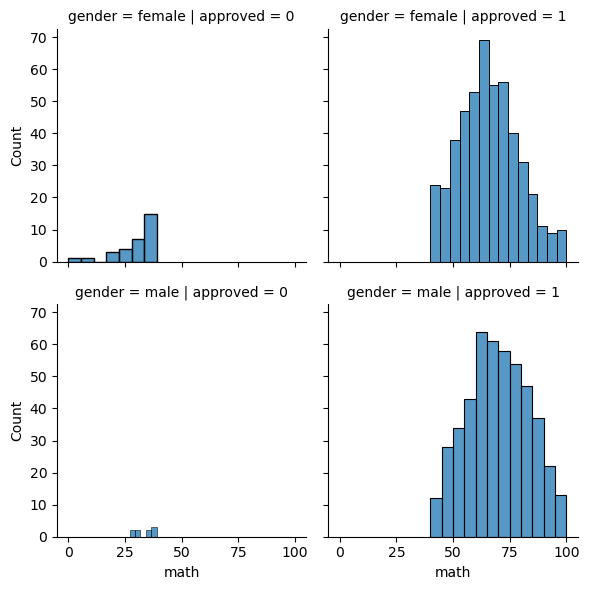

In [69]:
g = sns.FacetGrid(df, col='approved', row='gender')
g.map(sns.histplot, 'math', palette=palette);

c:\Users\Ticio\anaconda3\Lib\site-packages\seaborn\axisgrid.py:848: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(*plot_args, **plot_kwargs)
c:\Users\Ticio\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Ticio\anaconda3\Lib\site-packages\seaborn\axisgrid.py:848: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(*plot_args, **plot_kwargs)
c:\Users\Ticio\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Ticio\anaconda3\Lib\site-packages\seaborn\axisgrid.py:848: UserWarning: Ignoring `palette` because no

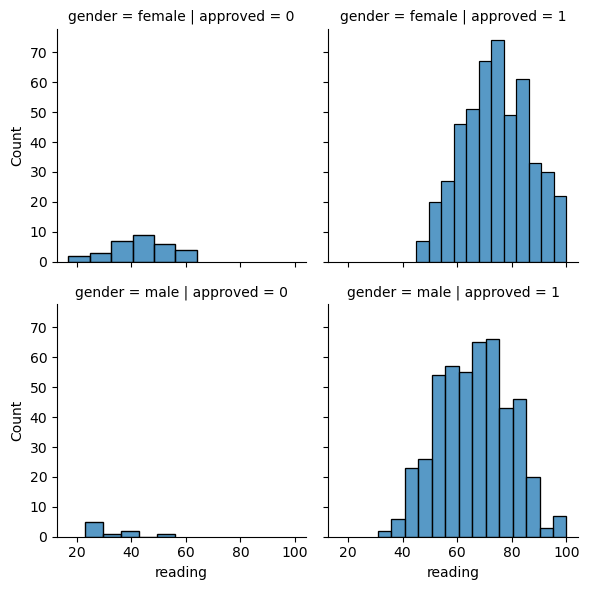

In [70]:
g = sns.FacetGrid(df, col='approved', row='gender')
g.map(sns.histplot, 'reading', palette=palette);

c:\Users\Ticio\anaconda3\Lib\site-packages\seaborn\axisgrid.py:848: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(*plot_args, **plot_kwargs)
c:\Users\Ticio\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Ticio\anaconda3\Lib\site-packages\seaborn\axisgrid.py:848: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(*plot_args, **plot_kwargs)
c:\Users\Ticio\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Ticio\anaconda3\Lib\site-packages\seaborn\axisgrid.py:848: UserWarning: Ignoring `palette` because no

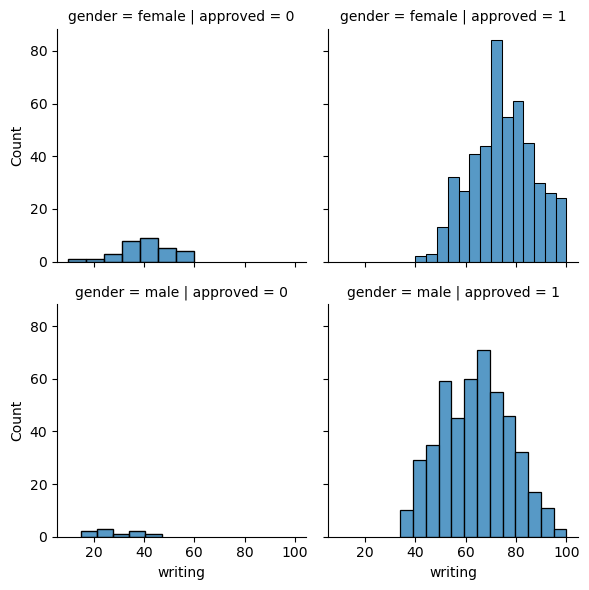

In [71]:
g = sns.FacetGrid(df, col='approved', row='gender')
g.map(sns.histplot, 'writing', palette=palette);

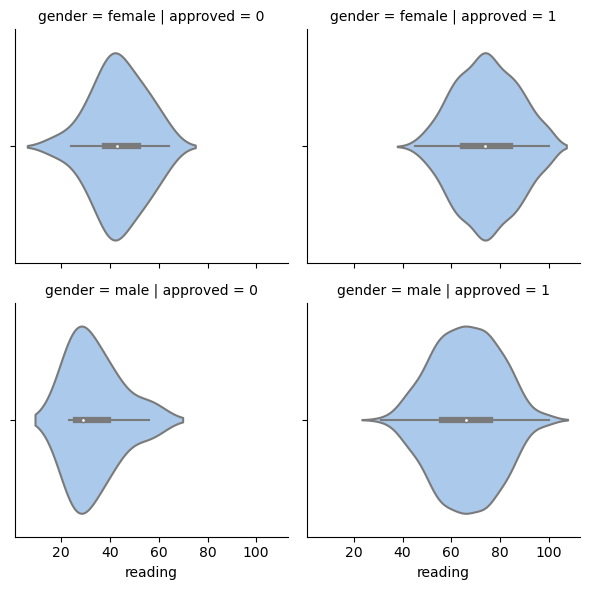

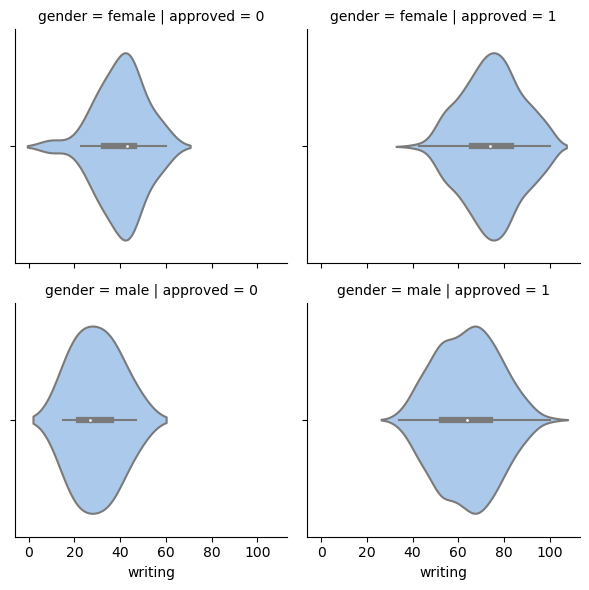

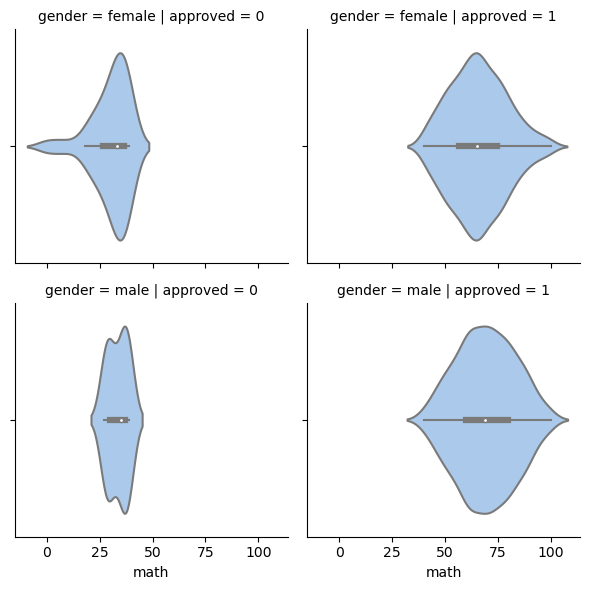

In [72]:
# let's repeat the three features with violinplots
for feature in ['reading', 'writing', 'math']:
    g = sns.FacetGrid(df, col='approved', row='gender', sharex=True, sharey=True)
    g.map(sns.violinplot, feature, order=None, palette=palette);

If we prepare data for seaborn, seaborn will give what we want. For instance, `seaborn.violinplot()` permits to split the violin distribution using a secondary binary `hue` feature. But this just can be done when using parameters `x` and `y`. In this case we can use a dummy feature to plot what we want. Knowing this will help us to improve our previous plot.

Text(0.5, 0.98, 'feature: reading')

Text(0.5, 0.98, 'feature: writing')

Text(0.5, 0.98, 'feature: math')

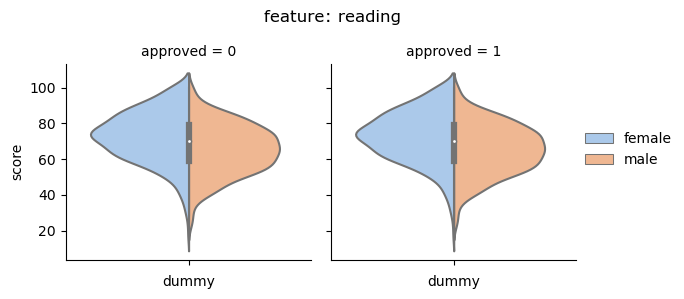

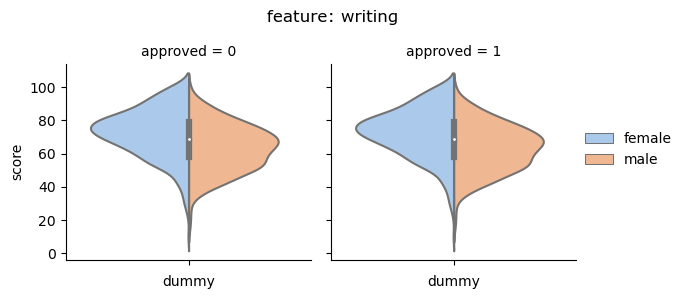

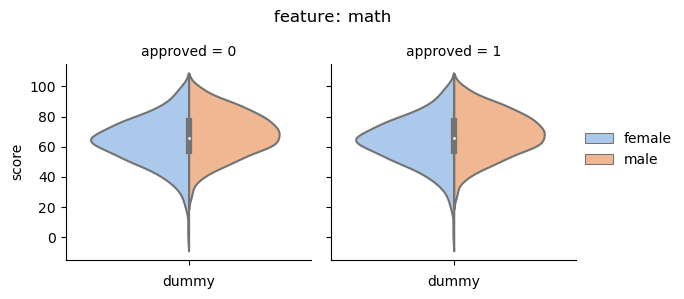

In [73]:
df['dummy'] = ''
# let's repeat the three features with violinplots
for feature in ['reading', 'writing', 'math']:
    g = sns.FacetGrid(df, col='approved', sharey=True)
    g.map(sns.violinplot, data=df, x='dummy', y=feature, hue='gender', split=True, order=None, palette=palette);
    g.add_legend() # we want to display the gender legend
    g.set_ylabels('score')
    g.fig.subplots_adjust(top=0.8)
    g.fig.suptitle(f'feature: {feature}', fontsize=12, font='verdana')
del df['dummy']

### PairGrid

seaborn.PairGrid() is a great tool that let us extend seaborn plots easily.

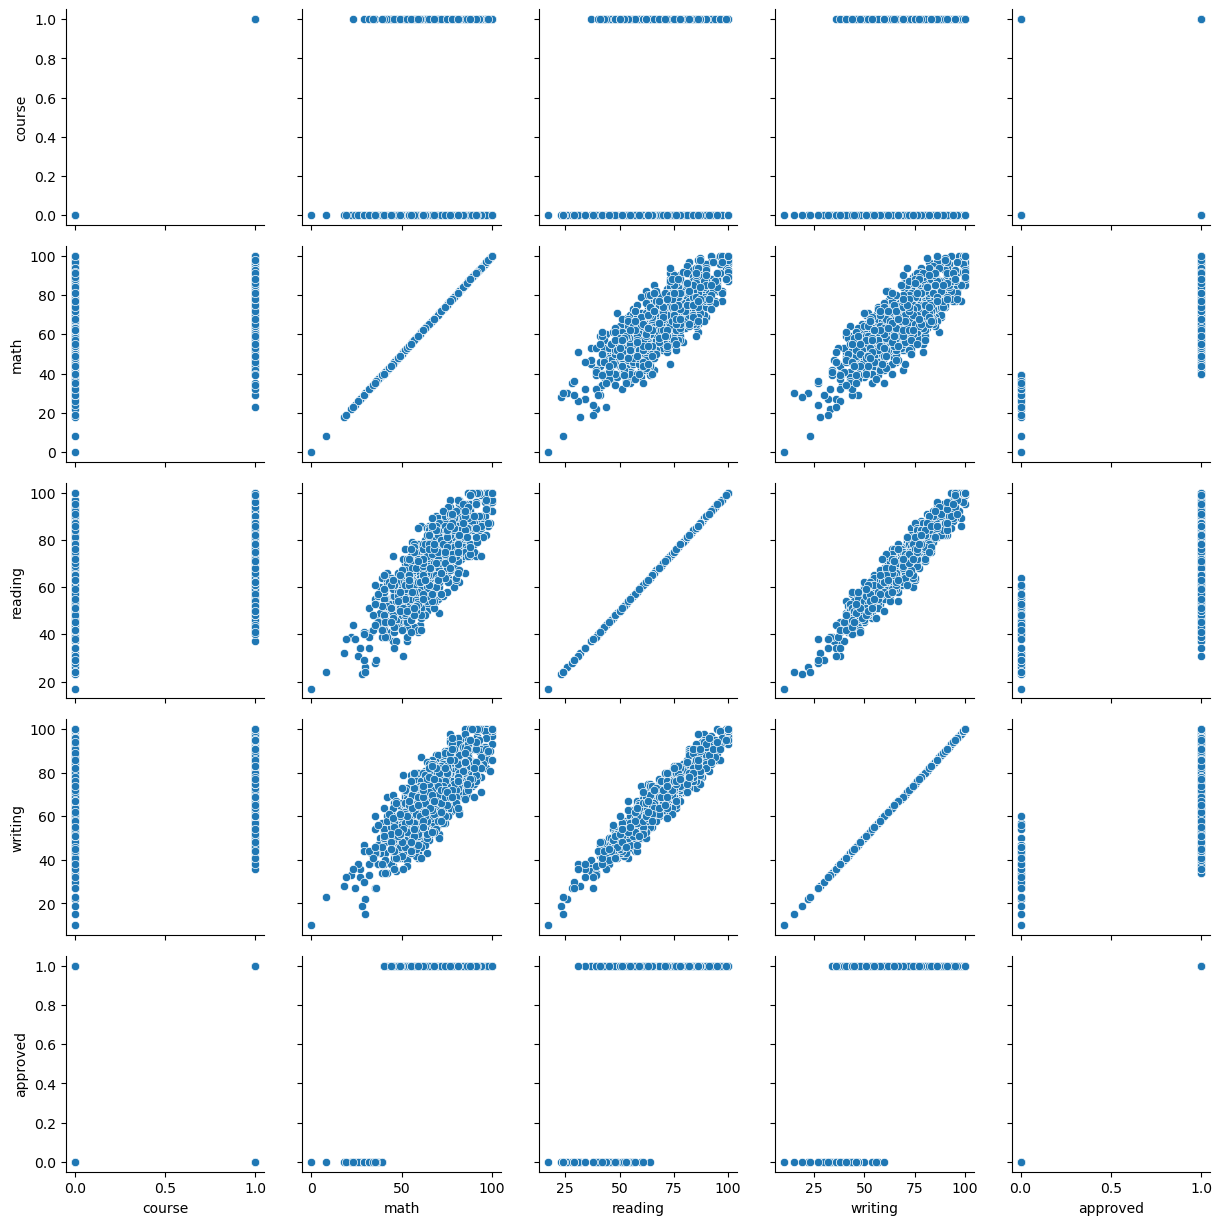

In [74]:
# this should do something similar to pairplot() but without setting the histogram in the diagonal
g = sns.PairGrid(df)
g.map(sns.scatterplot);

In [86]:
del df['is_female']
del df['is_male']

Maybe you didn't see the power of PairGrids. Let's try again with a new custom PairGrid plot with multivariate KDE subplots

c:\Users\Ticio\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Ticio\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Ticio\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Ticio\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

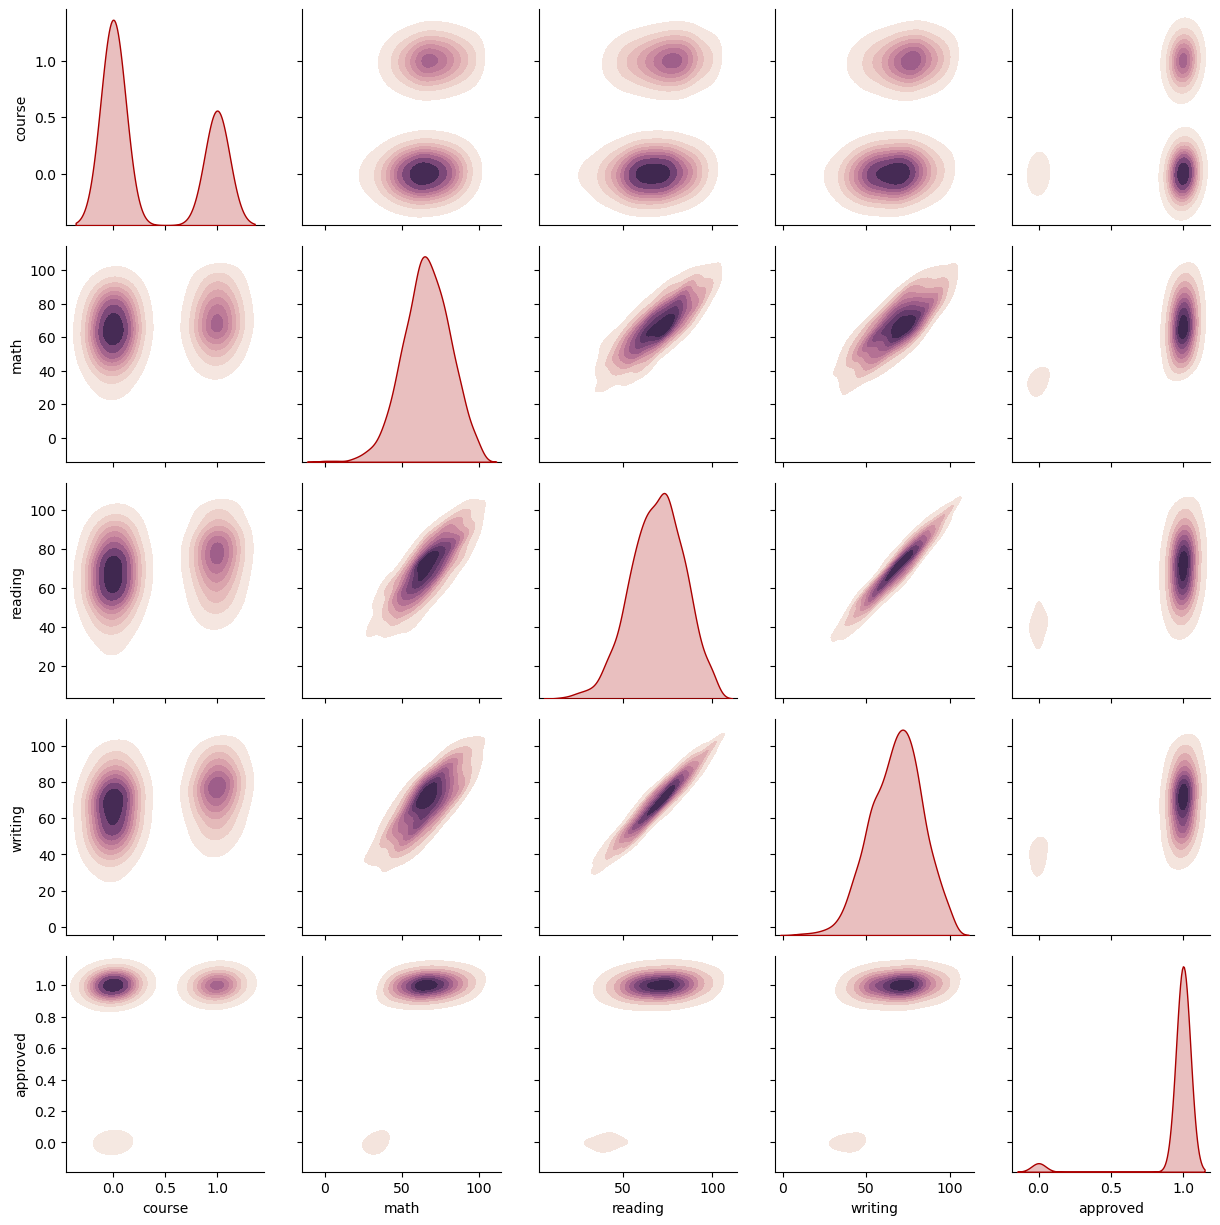

In [87]:
# Create a cubehelix colormap to use with kdeplot
cmap = sns.cubehelix_palette(start=0, light=.95, as_cmap=True)
g = sns.PairGrid(df, diag_sharey=False)
g.map_upper(sns.kdeplot, cmap=cmap, fill=True)
g.map_lower(sns.kdeplot, cmap=cmap, fill=True)
g.map_diag(sns.kdeplot, color='#aa0000', fill=True);

<a id='summary'></a>
## Summary of functions

**Pandas**
- pandas.read_csv()
- pandas.concat()
- pandas.get_dummies()
- DataFrame.info()
- DataFrame.head()
- DataFrame.sample()
- DataFrame.describe()
- DataFrame.unique()
- DataFrame.str
- DataFrame.grouby()
- DataFrame.sourt_values()
- DataFrame.corr()
- DataFrame.corrwith()
- DataFrameGroupBy.size()

**Pandas (plotting)**
- DataFrame.boxplot()
- DataFrame.hist()
- DataFrame.plot()
- DataFrame.plot.kde()
- DataFrame.plot.pie()
- DataFrame.plot.scatter()

**matplotlib**
- matplotlib.pyplot.subplots()
- matplotlib.pyplot.title()
- matplotlib.pyplot.plot()
- matplotlib.pyplot.suptitle()
- matplotlib.pyplot.subplot()
- matplotlib.pyplot.subplots_adjust()
- matplotlib.pyplot.ylabel()
- matplotlib.pyplot.legend()
- matplotlib.pyplot.figure()

**seaborn**
- seaborn.boxplot()
- seaborn.boxenplot()
- seaborn.histplot()
- seaborn.barplot()
- seaborn.countplot()
- seaborn.scatterplot()
- seaborn.violinplot()
- seaborn.lineplot()
- seaborn.pairplot()
- seaborn.heatmap()
- seaborn.kdeplot()
- seaborn.FacetGrid()
- seaborn.PairGrid()